# Reports on Participants Demographics

Date: April 19, 2019 
Author: Shabnam Haghzare
The following code reports on the number of participants screened- included and gemographics

__Extremely useful resource for power analysis:__
https://rpsychologist.com/d3/NHST/

In [419]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [420]:
# Initialization
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.table as tbl
plt.style.use('seaborn-darkgrid')

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

__The folwoing will read the dmographics excel sheet and reports the follwong__

* demographics- Age and Years of Education
* Vision: ETDRS: OD & OS
* Cognition: MoCA
* Mood Status

** To be added: p-value of each with acceptance scores on the right

## Reading the Excel Sheets

In [314]:
# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Data\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
Demographics = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "Master Data")
Demographics = Demographics.set_index('Participant ID')


In [315]:
type(Demographics)

pandas.core.frame.DataFrame

In [316]:
Demographics.head()

Date         Status Manual/Auto Order  \
Participant ID                                               
1.0                   NaT  Not Completed               NaN   
2.0            2019-12-07  Not Completed                MA   
3.0                   NaT  Not Completed               NaN   
4.0            2019-01-25      Completed                MA   
5.0            2019-02-01   Missing Data                AM   

               Normal (1)/ Rain (2)              Participant Group   Age  Sex  \
Participant ID                                                                  
1.0                             NaN                            NaN   NaN  NaN   
2.0                              2*              PM,PA,RM,RA,TM,TA  75.0    F   
3.0                             NaN                            NaN   NaN  NaN   
4.0                              2*  PM,PA,RM,RA,TM,TA,NormM,NormA  66.0    F   
5.0                              2*                    PM,PA,RA,RM  75.0    M   

               Handedness Highest Level of Education Valid Drivers' License  \
Participant ID                                                                
1.0                   NaN                        NaN                    NaN   
2.0                 Right              Undergraduate                    Yes   
3.0                   NaN                        NaN                    NaN   
4.0                 Right               Professional                    Yes   
5.0                 Right               Professional                    Yes   

                ... Concentration/Attention Problems Memory Problems  \
Participant ID  ...                                                    
1.0             ...                              NaN             NaN   
2.0             ...                               No              No   
3.0             ...                              NaN             NaN   
4.0             ...                               No              No   
5.0             ...                               No              No   

               Difficulty Finding Words Fallen in the last year  \
Participant ID                                                    
1.0                                 NaN                     NaN   
2.0                                  No                      No   
3.0                                 NaN                     NaN   
4.0                                  No                      No   
5.0                                 Yes                      No   

               Near Falls Last Year Fearful of Falling MoCA Score  \
Participant ID                                                      
1.0                             NaN                NaN        NaN   
2.0                              No                 No       27.0   
3.0                             NaN                NaN        NaN   
4.0                              No                 No       27.0   
5.0                             Yes                Yes       26.0   

               Visual Acquity Score (LogMAR)_Right  \
Participant ID                                       
1.0                                            NaN   
2.0                                           0.24   
3.0                                            NaN   
4.0                                           0.16   
5.0                                            NaN   

               Visual Acquity Score (LogMAR)_Left Total POMS Score  
Participant ID                                                      
1.0                                           NaN                0  
2.0                                          0.24              -22  
3.0                                           NaN                0  
4.0                                          0.08              -24  
5.0                                           NaN               -6  

[5 rows x 58 columns]

# 1. Demographics

## 1.1 Plotting the table on current recruitment status

In [317]:
status = Demographics.groupby('Status')
status.groups

{'Completed': Float64Index([4.0, 7.0, 9.0], dtype='float64', name='Participant ID'),
 'Completed-RN': Float64Index([16.0, 18.0], dtype='float64', name='Participant ID'),
 'Missing Data': Float64Index([5.0, 6.0, 10.0, 11.0, 12.0, 14.0, 15.0, 24.0], dtype='float64', name='Participant ID'),
 'Not Completed': Float64Index([1.0, 2.0, 3.0, 8.0], dtype='float64', name='Participant ID')}

In [318]:
completed_IDs = np.array(status.groups['Completed'])
incompleted_IDs = np.array(status.groups['Missing Data'])
excluded_IDs = np.array(status.groups['Did not Come In'])

## Those who are going to be analysed are complted and completed-RNs
Analyzed_IDs = np.sort(np.concatenate((completed_IDs, completed_RN_IDs)))

In [319]:
Analyzed_IDs

array([ 4.,  7.,  9., 16., 18.])

In [320]:
list((status.groups.keys()))

['Completed', 'Completed-RN', 'Missing Data', 'Not Completed']

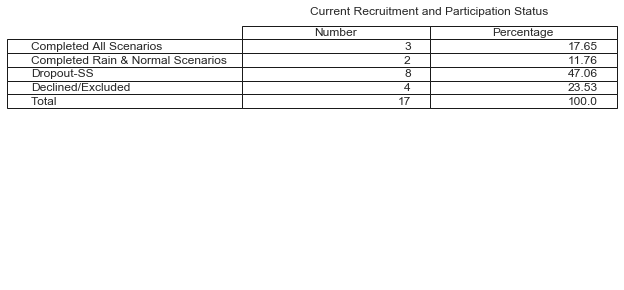

In [321]:
Total = np.sum([np.count_nonzero(completed_IDs)
        ,np.count_nonzero(completed_RN_IDs)
        ,np.count_nonzero(incompleted_IDs)
        ,np.count_nonzero(excluded_IDs)])

participant_counter = [[np.count_nonzero(completed_IDs), (np.count_nonzero(completed_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(completed_RN_IDs), (np.count_nonzero(completed_RN_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(incompleted_IDs),(np.count_nonzero(incompleted_IDs)/Total*100).round(2)]
        ,[np.count_nonzero(excluded_IDs), (np.count_nonzero(excluded_IDs)/Total*100).round(2) ]
        ,[Total, Total/Total*100]]

status_keys = ["Completed All Scenarios", "Completed Rain & Normal Scenarios"
               ,"Dropout-SS", "Declined/Excluded", "Total"]


fig, ax = plt.subplots()

# hide axes

ax.axis('off')
ax.axis('tight')

ax.table(cellText=participant_counter,
        rowLabels=status_keys,
        colLabels = ["Number", "Percentage"],
        loc='upper center')
        
fig.tight_layout()

plt.title('Current Recruitment and Participation Status')
plt.show()


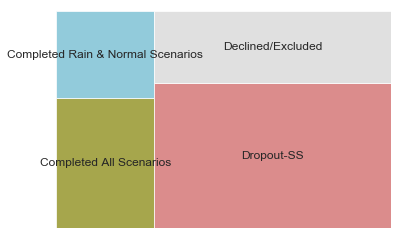

In [322]:
import squarify    # pip install squarify (algorithm for treemap)
 
participant_counter = [np.count_nonzero(completed_IDs)
        ,np.count_nonzero(completed_RN_IDs)
        ,np.count_nonzero(incompleted_IDs)
        ,np.count_nonzero(excluded_IDs)]

        
# If you have 2 lists
squarify.plot(sizes=participant_counter, label= status_keys[0:-1],color=["olive","c", "indianred", "lightgrey"]
              , alpha=.7)
plt.axis('off')
plt.show()


### 1.2 Plotting the Demographics 

**From here on we will only look into participants who completed everything or completed-RN.**

The code below reports demographics of participants in "Analyzed_IDs" 

* demographics- Age and Years of Education
* Vision: ETDRS: OD & OS
* Cognition: MoCA


** To do: report the four above items in a Table.

In [323]:
Analyzed_IDs

array([ 4.,  7.,  9., 16., 18.])

In [324]:
type(Demographics)

pandas.core.frame.DataFrame

In [325]:
Analyzed_demographics = Demographics.loc[Analyzed_IDs]

In [326]:
Analyzed_demographics.loc[:, 'Highest Level of Education'].nunique

<bound method IndexOpsMixin.nunique of Participant ID
4.0      Professional
7.0     Undergraduate
9.0          Graduate
16.0         Graduate
18.0        Secondary
Name: Highest Level of Education, dtype: object>

Text(0.5, 1.0, 'Histogram of Age')

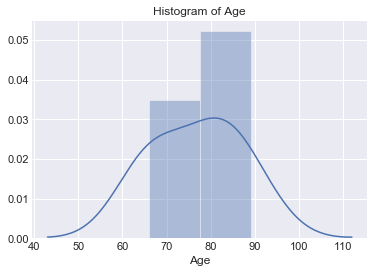

In [327]:
sns.distplot(Analyzed_demographics['Age'])
plt.title('Histogram of Age')

Text(0.5, 1.0, 'Histogram of MoCA Scores')

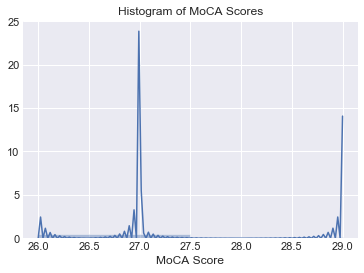

In [328]:
sns.distplot(Analyzed_demographics['MoCA Score'])
plt.title('Histogram of MoCA Scores')

Text(0.5, 1.0, 'Years of Driving Experience')

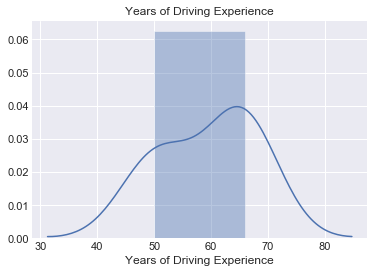

In [329]:
Analyzed_demographics.loc[:,'Years of Driving Experience']= Analyzed_demographics.loc[:,'Years of Driving Experience'].astype(float)
sns.distplot(Analyzed_demographics['Years of Driving Experience'])
plt.title('Years of Driving Experience')

In [330]:
Analyzed_demographics.mean()

Age                                    76.800
Years of Driving Experience            59.400
MoCA Score                             27.200
Visual Acquity Score (LogMAR)_Right     0.236
Visual Acquity Score (LogMAR)_Left      0.168
Total POMS Score                      -15.200
dtype: float64

In [331]:
Analyzed_demographics.std()

Age                                    9.959920
Years of Driving Experience            8.142481
MoCA Score                             1.095445
Visual Acquity Score (LogMAR)_Right    0.065422
Visual Acquity Score (LogMAR)_Left     0.086718
Total POMS Score                       6.685806
dtype: float64

# 2. POMS Scores

The following code will read the POMS scores of Analyzed_ID participants.

1. Compute the t-score with the following formula
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/t-distribution/t-score-formula/

Step 1, calculate z-score:
$$ Z = \frac{RawScore - \mu}{\sigma} $$

Step 2, calculate t-score from z-score:
$$ T = (Z x 10) + 50 $$


**Note:** The higher the POMS total, the lower is the mood.

In [332]:
# Reading the mood scores of Analyzed IDs

# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Data\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
POMS = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "POMS Scoring Key")
POMS = POMS.set_index('Participant ID')


Analyzed_POMS = POMS.loc[Analyzed_IDs]

In [333]:
Analyzed_POMS

Tension Score  Anger Score  Fatigue Score  Depression Score  \
Participant ID                                                                
4                         0.0          0.0              0                 0   
7                         2.0          1.0              0                 0   
9                         0.0          0.0              0                 0   
16                        6.0          0.0              6                 0   
18                        9.0          0.0              2                 3   

                Esteem-related affect Score  Vigour Score  Confusion Score  \
Participant ID                                                               
4                                         9            15                0   
7                                        11            12                2   
9                                         9             8                0   
16                                       11            13                4   
18                                       12            20                9   

                Total POMS Score  
Participant ID                    
4                            -24  
7                            -18  
9                            -17  
16                            -8  
18                            -9

## 2.1 Computing POMS t-score

In [334]:
# compute the t-score over 7 different scales nad the total scale

def scale_stats(ScaleString):
    mu    = Analyzed_POMS.loc[:,ScaleString].mean()
    sigma = Analyzed_POMS.loc[:,ScaleString].std()
    tscores = 50 + 10 * (Analyzed_POMS.loc[:,ScaleString]-mu) / sigma
    return mu, sigma, tscores

TEN_mean, TEN_std, TEN_tscores = scale_stats('Tension Score')
ANG_mean, ANG_std, ANG_tscores = scale_stats('Anger Score')
FAT_mean, FAT_std, FAT_tscores = scale_stats('Fatigue Score')
DEP_mean, DEP_std, DEP_tscores = scale_stats('Depression Score')
ERA_mean, ERA_std, ERA_tscores = scale_stats('Esteem-related affect Score')
VIG_mean, VIG_std, VIG_tscores = scale_stats('Vigour Score')
CON_mean, CON_std, CON_tscores = scale_stats('Confusion Score')
TOT_mean, TOT_std, TOT_tscores = scale_stats('Total POMS Score')

POMS_tscores = pd.concat([TEN_tscores, ANG_tscores, FAT_tscores, DEP_tscores, ERA_tscores, VIG_tscores
                                             , CON_tscores, TOT_tscores], axis = 1)

In [335]:
POMS_tscores

Tension Score  Anger Score  Fatigue Score  Depression Score  \
Participant ID                                                                
4                   41.446372    45.527864       43.86428         45.527864   
7                   46.477918    67.888544       43.86428         45.527864   
9                   41.446372    45.527864       43.86428         45.527864   
16                  56.541010    45.527864       66.87323         45.527864   
18                  64.088329    45.527864       51.53393         67.888544   

                Esteem-related affect Score  Vigour Score  Confusion Score  \
Participant ID                                                               
4                                 39.565016     53.186760        41.982163   
7                                 54.472136     46.357988        47.327388   
9                                 39.565016     37.252959        41.982163   
16                                54.472136     48.634246        52.672612   
18                                61.925696     64.568047        66.035675   

                Total POMS Score  
Participant ID                    
4                      36.837787  
7                      45.812023  
9                      47.307729  
16                     60.769083  
18                     59.273377

Text(0.5, 1.0, 'Histogram of Total POMS Score')

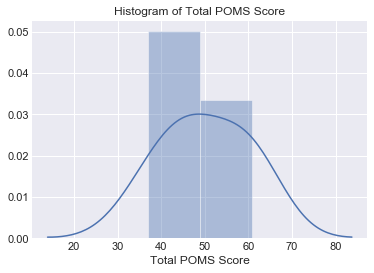

In [336]:
sns.distplot(POMS_tscores['Total POMS Score'])
plt.title('Histogram of Total POMS Score')

### 3. Analyzing the Acceptability Scores

In the following code:

3.1 Internal Validity with Cronbach’s Alpha; with alpha > 0.7 criteria recommended by Nunnally (1978)
3.2 The acceptability scores will be corrected by deleting the items resultig in low internal consistency.
3.3 Correlation analyses were conducted including all of the variables to check for multicollinearity

__!Note: Under PC scale/dangerous item is reversed after reading the data.__

In [337]:
# Reading the acceptability scores of Analyzed IDs

# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Data\\Master_Data_List\\Qualitative\\")

def read_acc_questionnaire(excel, worksheet):
    df = pd.read_excel(Qualitative_Path + excel + ".xlsx", sheet_name = worksheet)
    df.columns = df.loc[0,:]
    df.drop(index = 0)
    df = df.set_index('Participant ID')
    df.drop(index = 'Participant ID')
    
    ## Looking only into the ones picked for analysis
    Analyzed_df = df.loc[Analyzed_IDs]
    
    return df, Analyzed_df

# reading the acceptance masterlist into a dataframe--- index = participant ID, colums = feature label
ACC_master, Analyzed_ACC_master = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_MasterList")

# Pre-exposure acceptability questionnaire
ACC_PRE, Analyzed_ACC_PRE       = read_acc_questionnaire("AcceptabilityQuestionnaires", "PRE")

# Post exposure acceptability questionnaire
ACC_POST, Analyzed_ACC_POST     = read_acc_questionnaire("AcceptabilityQuestionnaires", "POST")

# Rain acceptability questionnaire - and inversing one item in the percieved safety scale
ACC_Rain, Analyzed_ACC_Rain     = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_Rain")
Analyzed_ACC_Rain['dangerous'] = list(8 - Analyzed_ACC_Rain['dangerous'])


# Normal questionnaire - and inversing one item in the percieved safety scale
ACC_Norm, Analyzed_ACC_Norm      = read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_Normal")
Analyzed_ACC_Norm['dangerous'] = list(8 - Analyzed_ACC_Norm['dangerous'])

In [338]:
Analyzed_ACC_Norm  

0                              Date     Status quickly Cost efficiently  \
Participant ID                                                            
4               2019-01-25 00:00:00  Completed       4                5   
7               2019-03-15 00:00:00  Completed       7                4   
9               2019-03-21 00:00:00  Completed       4                4   
16              2019-04-12 00:00:00  Completed       4                4   
18              2019-04-01 00:00:00  Completed       1                3   

0              Safely Easy to Use Clear & Understandable Easy to learn  \
Participant ID                                                           
4                   5           5                      4             5   
7                   6           7                      7             7   
9                   5           6                      5             6   
16                  2           3                      2             2   
18                  4           2                      3             5   

0              Proud to show Widely Used  ... plan to obtain dangerous  \
Participant ID                            ...                            
4                          4           5  ...              1         5   
7                          4           4  ...              7         3   
9                          5           6  ...              4         3   
16                         2           3  ...              1         1   
18                         4           1  ...              2         2   

0              feel safe trust Drive More often More comfortable  \
Participant ID                                                     
4                      4     4                4                5   
7                      3     3                1                3   
9                      4     4                3                5   
16                     1     1                1                1   
18                     3     3                1                1   

0              Waiting for AV failure AV consider to be mobility assistance  \
Participant ID                                                                
4                                   4                                     5   
7                                   4                                     7   
9                                   3                                     5   
16                                  7                                     1   
18                                  6                                     1   

0              AV than others driving me AV than accessibility transport  
Participant ID                                                            
4                                      7                               7  
7                                      7                               7  
9                                      5                               3  
16                                     2                               1  
18                                     2                               1  

[5 rows x 34 columns]

## 3.1 Rain and Normal Internal Consistency

Cronbach’s Alpha is calculated using the following formula:
https://data.library.virginia.edu/using-and-interpreting-cronbachs-alpha/

$$ \alpha = (\frac{K}{K-1})(1- \frac{\sum_{i=1}^{k}{\sigma^2_{y_i}} }{\sigma^2_x}) $$

In [339]:
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

# Below is a list of question for each scale
PE_scale_items = ['quickly','Cost efficiently','Safely']
EE_scale_items = ['Easy to Use','Clear & Understandable','Easy to learn']
SI_scale_items = ['Proud to show','Widely Used','Passengers']
FC_scale_items = ['Control Over the Journey','Knowledge Necessary','Infratructure']
AT_scale_items = ['Good idea','More Interesting','Fun']
SE_scale_items = ['Built-in assistance','no assistance','help of a person']
AN_scale_items = ['Concerns','Frightening',"don't understand"]
IU_scale_items = ['Predict to use','plan to obtain']
PC_scale_items = ['dangerous','feel safe','trust']


# Normal Cronbach
PE_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, PE_scale_items])
EE_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, EE_scale_items])
SI_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, SI_scale_items])
FC_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, FC_scale_items])
AT_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, AT_scale_items])
SE_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, SE_scale_items])
AN_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, AN_scale_items])
IU_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, IU_scale_items])
PC_cron_alpha_norm = cronbach_alpha(Analyzed_ACC_Norm.loc[:, PC_scale_items])
                                                                                  
# Rain Cronbach
PE_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, PE_scale_items])
EE_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, EE_scale_items])
SI_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, SI_scale_items])
FC_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, FC_scale_items])
AT_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, AT_scale_items])
SE_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, SE_scale_items])
AN_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, AN_scale_items])
IU_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, IU_scale_items])
PC_cron_alpha_rain = cronbach_alpha(Analyzed_ACC_Rain.loc[:, PC_scale_items])


C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [340]:
## Now we will concat the rain and norm acceptability scales to get an alpha for all observations (two from each person)


PE_RN = pd.concat([Analyzed_ACC_Norm.loc[:, PE_scale_items], Analyzed_ACC_Rain.loc[:, PE_scale_items]])
                   
EE_RN = pd.concat([Analyzed_ACC_Norm.loc[:, EE_scale_items], Analyzed_ACC_Rain.loc[:, EE_scale_items]]) 
                   
SI_RN = pd.concat([Analyzed_ACC_Norm.loc[:, SI_scale_items], Analyzed_ACC_Rain.loc[:, SI_scale_items]])   
                   
FC_RN = pd.concat([Analyzed_ACC_Norm.loc[:, FC_scale_items], Analyzed_ACC_Rain.loc[:, FC_scale_items]])
                   
AT_RN = pd.concat([Analyzed_ACC_Norm.loc[:, AT_scale_items], Analyzed_ACC_Rain.loc[:, AT_scale_items]])
                   
SE_RN = pd.concat([Analyzed_ACC_Norm.loc[:, SE_scale_items], Analyzed_ACC_Rain.loc[:, SE_scale_items]])
                  
AN_RN = pd.concat([Analyzed_ACC_Norm.loc[:, AN_scale_items], Analyzed_ACC_Rain.loc[:, AN_scale_items]])
                   
IU_RN = pd.concat([Analyzed_ACC_Norm.loc[:, IU_scale_items], Analyzed_ACC_Rain.loc[:, IU_scale_items]])
                   
PC_RN = pd.concat([Analyzed_ACC_Norm.loc[:, PC_scale_items], Analyzed_ACC_Rain.loc[:, PC_scale_items]])



alphas = pd.DataFrame(index = ['pre-adjust', 'post-adjust'])

alphas.loc['pre-adjust','PE'] = cronbach_alpha(PE_RN)
alphas.loc['pre-adjust','EE'] = cronbach_alpha(EE_RN)
alphas.loc['pre-adjust','SI'] = cronbach_alpha(SI_RN)
alphas.loc['pre-adjust','FC'] = cronbach_alpha(FC_RN)
alphas.loc['pre-adjust','AT'] = cronbach_alpha(AT_RN)
alphas.loc['pre-adjust','SE'] = cronbach_alpha(SE_RN)
alphas.loc['pre-adjust','AN'] = cronbach_alpha(AN_RN)
alphas.loc['pre-adjust','IU'] = cronbach_alpha(IU_RN)
alphas.loc['pre-adjust','PC'] = cronbach_alpha(PC_RN)

alphas

PE        EE        SI        FC        AT       SE  \
pre-adjust   0.745562  0.957157  0.879369  0.534555  0.794503  0.74794   
post-adjust       NaN       NaN       NaN       NaN       NaN      NaN   

                   AN        IU        PC  
pre-adjust   0.430435  0.817768  0.973262  
post-adjust       NaN       NaN       NaN

## 3.2 The next step is to identify those subscale who if deleted will increase the internal consistency
 for instance in the scale of anxiety, if we get rid of the 'I don't understand', we will get a higher internal consistency'
 

In [341]:
# this code reports the items that need to be further adjusted which have alpha<0.7
inconsistent_scales = []
for content in alphas.loc['pre-adjust'].items():
    inconsistent_scales.append(content[0]) 
    if content[1] < 0.7:
        print(content[0])

FC
AN


In [342]:
#for i in inconsistent_scales:
#    alphas.loc['post-adjust',content[0]] = cronbach_alpha

In [343]:
# For now we will be doing this manually- Adjust section 2 with the scales reported above to be inconsistent

FC_scale_items = ['Control Over the Journey','Knowledge Necessary','Infrastructure']
AN_scale_items = ['Concerns','Frightening',"don't understand"]

def find_nonesense_item_in_scale(scale_item):
    comparison_alphas = np.zeros(3)
    for i in range(len(scale_item)):
        help_list = scale_item[0:4]
        del help_list[i]
        concat_RN = pd.concat([Analyzed_ACC_Norm.loc[:, help_list], Analyzed_ACC_Rain.loc[:, help_list]])
        comparison_alphas[i] = cronbach_alpha(concat_RN)
    return comparison_alphas.max(), scale_item[comparison_alphas.argmax()]

 
alphas.loc['post-adjust','FC'], alphas.loc['deleted scale', 'FC'] = find_nonesense_item_in_scale(FC_scale_items)
alphas.loc['post-adjust','AN'], alphas.loc['deleted scale', 'AN'] = find_nonesense_item_in_scale(AN_scale_items)

alphas

PE        EE        SI                   FC        AT  \
pre-adjust     0.745562  0.957157  0.879369             0.534555  0.794503   
post-adjust         NaN       NaN       NaN             0.909904       NaN   
deleted scale       NaN       NaN       NaN  Knowledge Necessary       NaN   

                    SE                AN        IU        PC  
pre-adjust     0.74794          0.430435  0.817768  0.973262  
post-adjust        NaN          0.909091       NaN       NaN  
deleted scale      NaN  don't understand       NaN       NaN

### 3.2.1 We will now be deleting the items under each scale that resulted in low internal consistency. i.e., third rows in alphas.
- we will also delete the name in the list.

__NOTE: The rain and normal acc scores are replaced with a copy not containing the inconsistent items__

In [344]:
Analyzed_ACC_Norm.drop(columns = [alphas.loc['deleted scale', 'AN'], alphas.loc['deleted scale', 'FC']])
Analyzed_ACC_Rain.drop(columns = [alphas.loc['deleted scale', 'AN'], alphas.loc['deleted scale', 'FC']])

FC_scale_items.remove(alphas.loc['deleted scale', 'FC'])
AN_scale_items.remove(alphas.loc['deleted scale', 'AN'])

## 3.3 Now we will be looking at the correlation between different scales of acceptabiliy

__!NOTE:The Anxiety Scale is reversed for the cluster map but not for the correlation map.__  

- We wil first stack all items under each of the scales.
- Then get a mean value for each scale. 
- Get a correlation analysis for all.
- We will repeat with median as the indicator of each scale. 

In [345]:
## Choose mean or median
def stack_scales_of_acc(input_df):
    scale_index = input("choose the scale representing each scale?")
    acc_scales_stacked = pd.DataFrame()
    if scale_index == 'mean':
        acc_scales_stacked.loc[:,'Performance Expectancy'] = input_df.loc[:,PE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Effort Expectancy'] = input_df.loc[:,EE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Social Influence'] = input_df.loc[:,SI_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Facilitating Conditions'] = input_df.loc[:,FC_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Attitude'] = input_df.loc[:,AT_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Self Efficay'] = input_df.loc[:,SE_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Anxiety'] = input_df.loc[:,AN_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Intention to Use'] = input_df.loc[:,IU_scale_items].mean(1)
        acc_scales_stacked.loc[:,'Percieved Safety'] = input_df.loc[:,PC_scale_items].mean(1)
    elif scale_index == 'median':
        acc_scales_stacked.loc[:,'Performance Expectancy'] = input_df.loc[:,PE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Effort Expectancy'] = input_df.loc[:,EE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Social Influence'] = input_df.loc[:,SI_scale_items].median(1)
        acc_scales_stacked.loc[:,'Facilitating Conditions'] = input_df.loc[:,FC_scale_items].median(1)
        acc_scales_stacked.loc[:,'Attitude'] = input_df.loc[:,AT_scale_items].median(1)
        acc_scales_stacked.loc[:,'Self Efficay'] = input_df.loc[:,SE_scale_items].median(1)
        acc_scales_stacked.loc[:,'Anxiety'] = input_df.loc[:,AN_scale_items].median(1)
        acc_scales_stacked.loc[:,'Intention to Use'] = input_df.loc[:,IU_scale_items].median(1)
        acc_scales_stacked.loc[:,'Percieved Safety'] = input_df.loc[:,PC_scale_items].median(1)
    return acc_scales_stacked 
    
rain_acc_stacked = stack_scales_of_acc(Analyzed_ACC_Rain)
norm_acc_stacked = stack_scales_of_acc(Analyzed_ACC_Norm)

choose the scale representing each scale?mean
choose the scale representing each scale?mean


In [346]:
norm_acc_stacked

Performance Expectancy  Effort Expectancy  Social Influence  \
Participant ID                                                                
4                             4.666667           4.666667          4.666667   
7                             5.666667           7.000000          3.000000   
9                             4.333333           5.666667          5.666667   
16                            3.333333           2.333333          2.000000   
18                            2.666667           3.333333          2.000000   

                Facilitating Conditions  Attitude  Self Efficay  Anxiety  \
Participant ID                                                             
4                                   4.0  4.666667      4.333333      5.0   
7                                   5.5  3.666667      6.000000      5.5   
9                                   5.0  4.000000      5.333333      4.5   
16                                  1.0  1.333333      2.333333      7.0   
18                                  2.0  2.333333      5.000000      6.0   

                Intention to Use  Percieved Safety  
Participant ID                                      
4                            3.0          4.333333  
7                            7.0          3.000000  
9                            4.0          3.666667  
16                           1.0          1.000000  
18                           2.0          2.666667

### Correlation Matrix- ACC Combined
** Towards better heatmap and correlation matrix plots
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

**Spearman Coorelation:**
Spearman's correlation determines the strength and direction of the monotonic relationship between your two variables rather than the strength and direction of the linear relationship between your two variables, which is what Pearson's correlation determines.

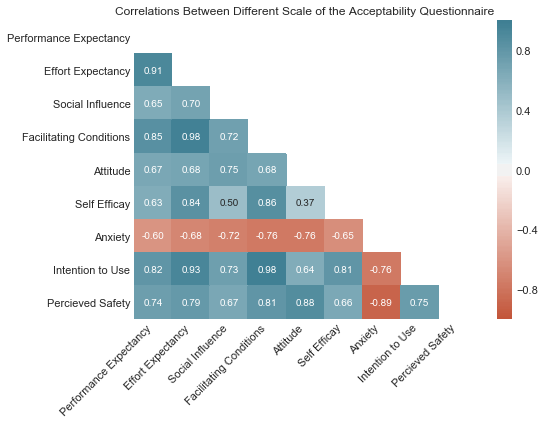

In [347]:
%matplotlib inline
sns.set_style('ticks')

# this will results in condition x analyzied num of participants as observations
concat_RN  = pd.concat([rain_acc_stacked, norm_acc_stacked])
concat_RN = concat_RN.apply(lambda x: pd.to_numeric(x, errors='ignore'))
corr_matrix = concat_RN.corr(method='spearman')

# mask for upper traingle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 

# vmin and vmax control the range of the colormap
#cmap='RdBu'
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask = mask, cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability Questionnaire")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

### Clustermap

Clustermaps make correlations especially informative in analyzing survey responses, because they use hierarchical clustering to (in this case) group benefits together by how closely related they are.

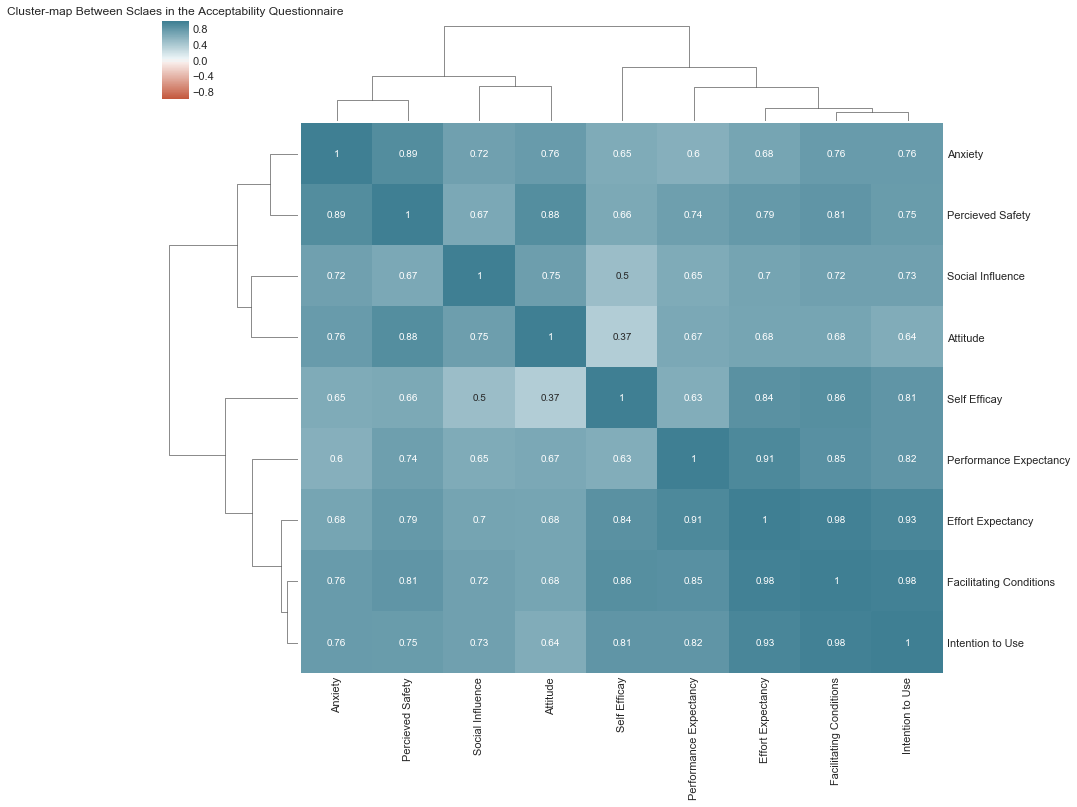

In [348]:
concat_RN_anx_reverse = concat_RN.copy()
concat_RN_anx_reverse['Anxiety'] = list(8- concat_RN_anx_reverse['Anxiety'])
corr_matrix_anx_reversed = concat_RN_anx_reverse.corr(method='spearman')


sns.clustermap(corr_matrix_anx_reversed, method='ward', cmap=sns.diverging_palette(20, 220, n=200), annot=True,
               vmin=-1, vmax=1, figsize=(14,12))

plt.title("Cluster-map Between Sclaes in the Acceptability Questionnaire")



plt.show()

## 3.4 Below, ACC Scores and Demographics

- Linear regression of acceptability scores (y; rain, normal and total) by age
- linear regression of acceptability scores (y; rain, normal and total) by MoCA scores
- Linear regression of acceptability scores (y; rain, normal and total) by years of driving experience
- Visual Acquity Score (LogMAR)_Right 
- Visual Acquity Score (LogMAR)_Left

#### 3.4.1 We will first look at the demographics themselves and how they correlate:

In [349]:
# first we will get the countable measures of interest from dempgraphics
countable_demographics = Analyzed_demographics.copy()
countable_demographics_measures = ['Age', 'Years of Driving Experience', 'MoCA Score',
                                                    'Visual Acquity Score (LogMAR)_Right',
                                                    'Visual Acquity Score (LogMAR)_Left']

countable_demographics = countable_demographics.loc[:,countable_demographics_measures ]
demographics_corr_matrix = countable_demographics.corr(method = 'pearson')

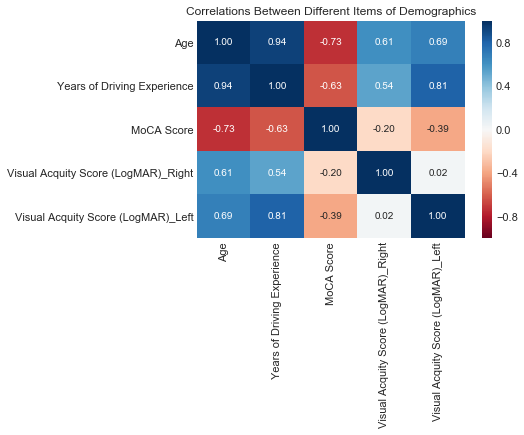

In [350]:
# Drawing the correlation map between the countable demographics
cmap='RdBu'
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(demographics_corr_matrix , cmap=cmap, annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

plt.title("Correlations Between Different Items of Demographics")

plt.show()

The dark red colour represents that there is no linear relationship between the two variables. A darker blue shade shows that the relationship between the variables is more linear.

#### 3.4.2 Below, we will look at the TOTAL ACC and Subscales as a function of age, MoCA, years of driving and LogMAR

In [351]:
## we will take total scales in acc and concat them 
def add_total_scores_to_scenario_acc(df, scenario_string):
    df.loc[:,"Median Acceptability"] = rain_acc_stacked.median(1)
    df.loc[:,"Mean Acceptability"] = rain_acc_stacked.mean(1)
    df.loc[:,"Driving Condition"] = scenario_string
    return df

rain_acc_totals = add_total_scores_to_scenario_acc(rain_acc_stacked, "Rain")
norm_acc_totals = add_total_scores_to_scenario_acc(norm_acc_stacked, 'Norm')

acc_total_per_scenario = pd.concat([norm_acc_totals, rain_acc_totals],0)

acc_total_per_scenario #: acc scores across all scales + total for each scenario in a row

Performance Expectancy  Effort Expectancy  Social Influence  \
Participant ID                                                                
4                             4.666667           4.666667          4.666667   
7                             5.666667           7.000000          3.000000   
9                             4.333333           5.666667          5.666667   
16                            3.333333           2.333333          2.000000   
18                            2.666667           3.333333          2.000000   
4                             5.333333           6.666667          5.000000   
7                             5.666667           7.000000          5.000000   
9                             4.666667           6.000000          5.666667   
16                            3.000000           2.666667          1.666667   
18                            1.666667           2.333333          1.000000   

                Facilitating Conditions  Attitude  Self Efficay  Anxiety  \
Participant ID                                                             
4                                   4.0  4.666667      4.333333      5.0   
7                                   5.5  3.666667      6.000000      5.5   
9                                   5.0  4.000000      5.333333      4.5   
16                                  1.0  1.333333      2.333333      7.0   
18                                  2.0  2.333333      5.000000      6.0   
4                                   5.0  4.666667      5.000000      5.5   
7                                   7.0  4.333333      7.000000      5.0   
9                                   5.0  4.333333      4.666667      6.0   
16                                  1.5  1.333333      4.666667      7.0   
18                                  1.5  1.666667      3.000000      6.5   

                Intention to Use  Percieved Safety  Median Acceptability  \
Participant ID                                                             
4                            3.0          4.333333              5.000000   
7                            7.0          3.000000              6.000000   
9                            4.0          3.666667              4.666667   
16                           1.0          1.000000              1.666667   
18                           2.0          2.666667              1.666667   
4                            3.5          5.333333              5.000000   
7                            7.0          6.000000              6.000000   
9                            4.0          2.666667              4.666667   
16                           1.0          1.000000              1.666667   
18                           1.5          2.333333              1.666667   

                Mean Acceptability Driving Condition  
Participant ID                                        
4                         5.100000              Norm  
7                         6.000000              Norm  
9                         4.766667              Norm  
16                        2.550000              Norm  
18                        2.316667              Norm  
4                         5.100000              Rain  
7                         6.000000              Rain  
9                         4.766667              Rain  
16                        2.550000              Rain  
18                        2.316667              Rain

In [353]:
acc_total_per_per_participant = acc_total_per_scenario.groupby('Participant ID').mean()
acc_total_per_per_participant
#: acc scores (mean) across all scales + total for each participants in a row

Performance Expectancy  Effort Expectancy  Social Influence  \
Participant ID                                                                
4                             5.000000           5.666667          4.833333   
7                             5.666667           7.000000          4.000000   
9                             4.500000           5.833333          5.666667   
16                            3.166667           2.500000          1.833333   
18                            2.166667           2.833333          1.500000   

                Facilitating Conditions  Attitude  Self Efficay  Anxiety  \
Participant ID                                                             
4                                  4.50  4.666667      4.666667     5.25   
7                                  6.25  4.000000      6.500000     5.25   
9                                  5.00  4.166667      5.000000     5.25   
16                                 1.25  1.333333      3.500000     7.00   
18                                 1.75  2.000000      4.000000     6.25   

                Intention to Use  Percieved Safety  Median Acceptability  \
Participant ID                                                             
4                           3.25          4.833333              5.000000   
7                           7.00          4.500000              6.000000   
9                           4.00          3.166667              4.666667   
16                          1.00          1.000000              1.666667   
18                          1.75          2.500000              1.666667   

                Mean Acceptability  
Participant ID                      
4                         5.100000  
7                         6.000000  
9                         4.766667  
16                        2.550000  
18                        2.316667

In [354]:
## Saving for later sxport to R
duplicate_countable_demo = pd.concat([countable_demographics, countable_demographics], 0)
demo_acc = pd.concat([acc_total_per_scenario, duplicate_countable_demo],1)

# saving the data to export to R
export_demo_acc = demo_acc.to_csv (r'C:\Users\haghzaS\Documents\0-MAIN_STUDIES\01- Acceptability of AVs\Data Analysis\Qualitative_Data_Analysis\Version Control_April-19-2019\R-Exports\export_demo_acc.csv', index = None, header=True)

#### Exploring if there is a monotonic (spearman) or linear (pearson) relashionship between demographics and ACC scores

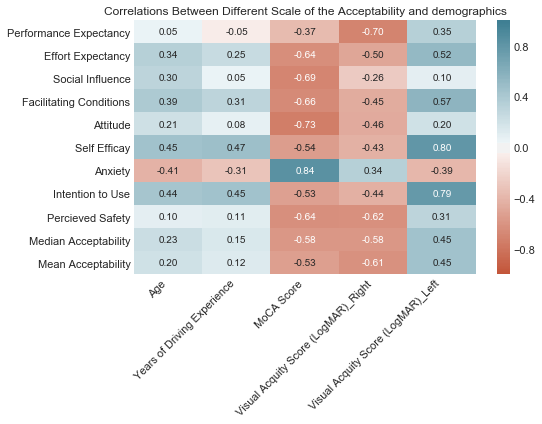

In [355]:
data = pd.concat([acc_total_per_per_participant, countable_demographics],1)
acc_demo_corr = data.corr(method = 'pearson').loc[acc_total_per_per_participant.keys(), countable_demographics.keys()]

fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(acc_demo_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability and demographics")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


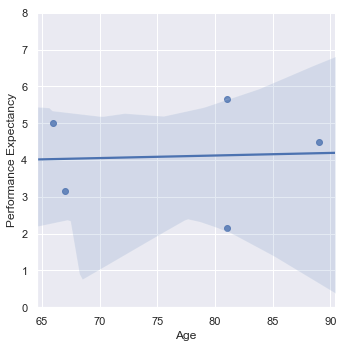

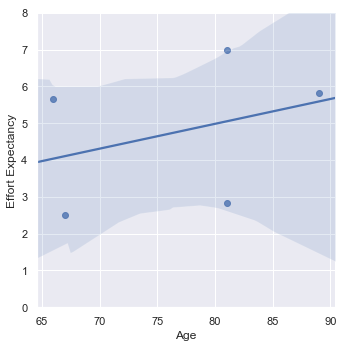

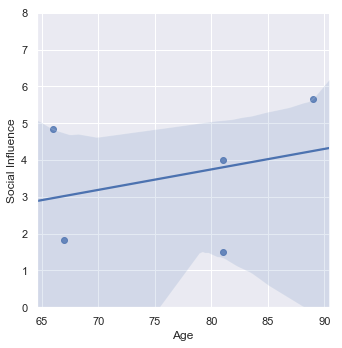

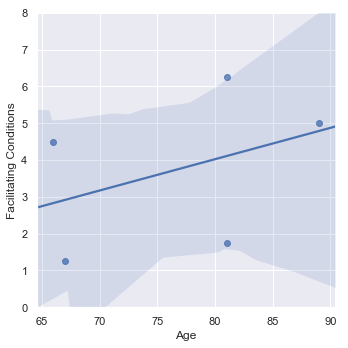

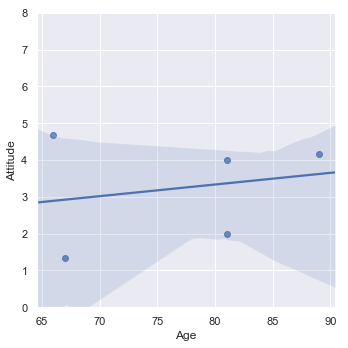

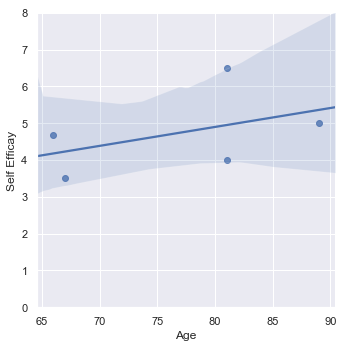

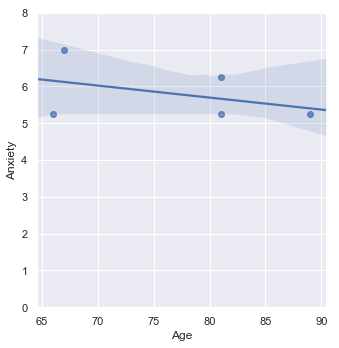

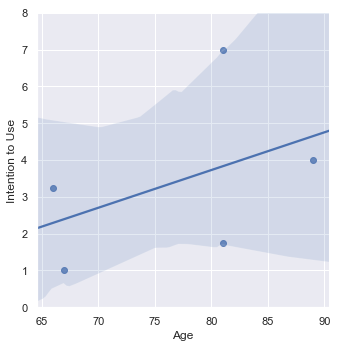

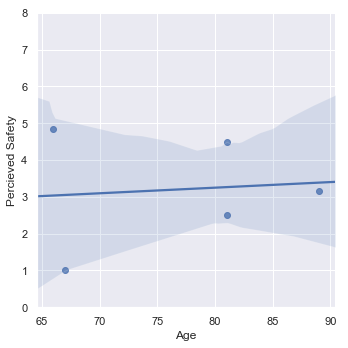

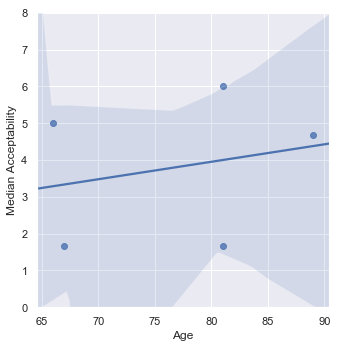

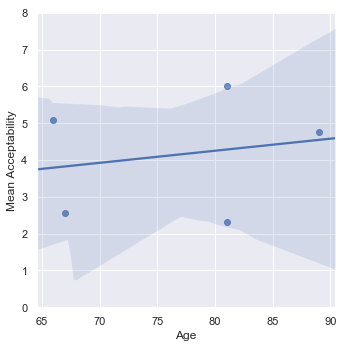

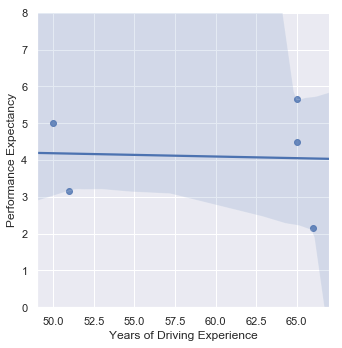

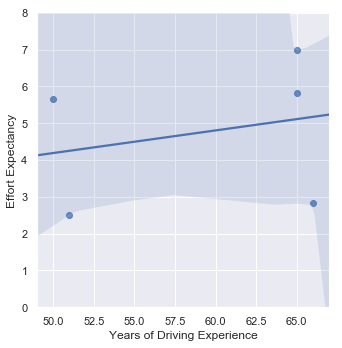

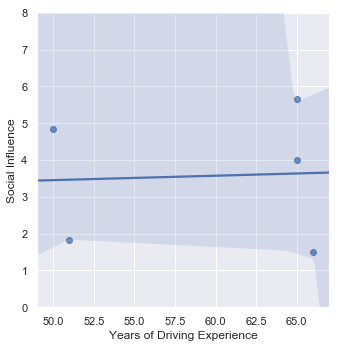

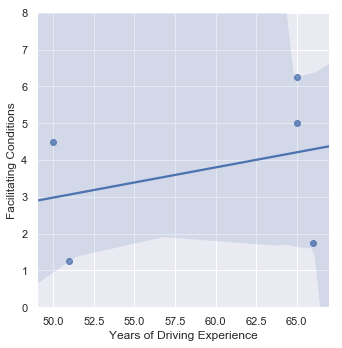

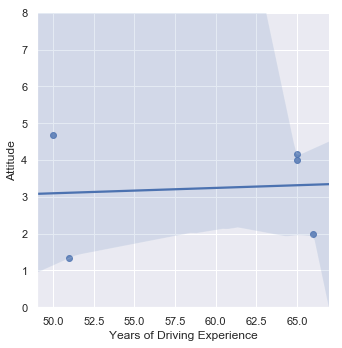

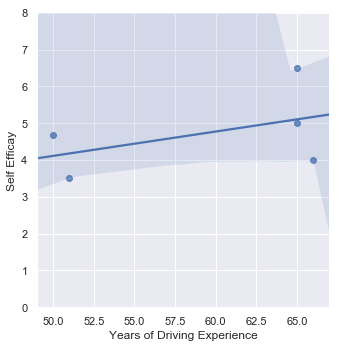

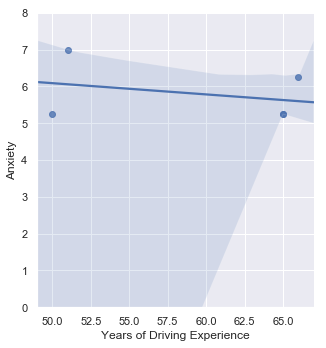

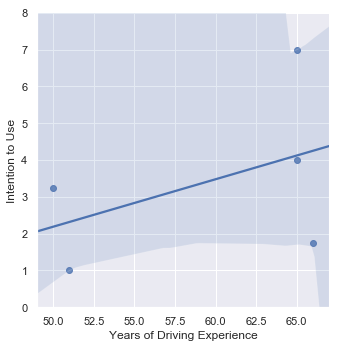

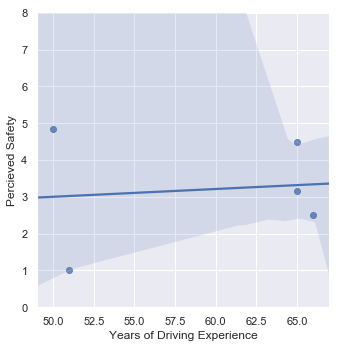

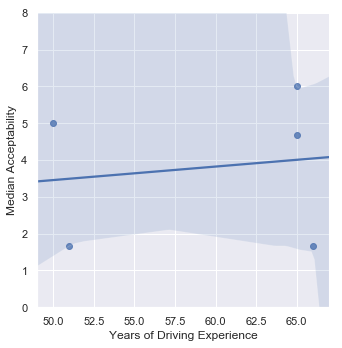

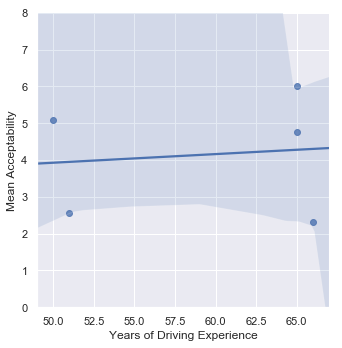

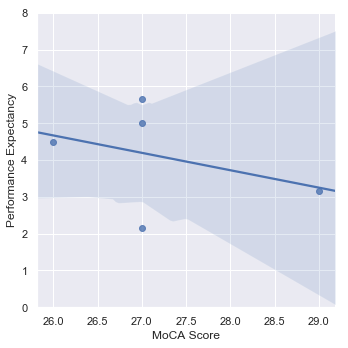

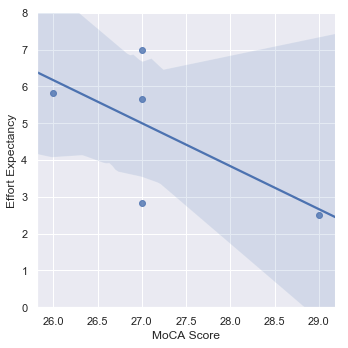

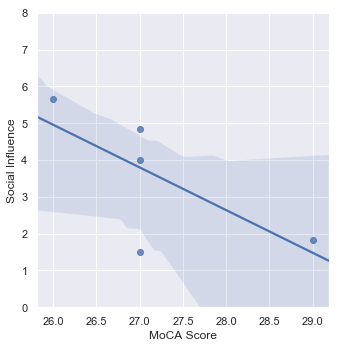

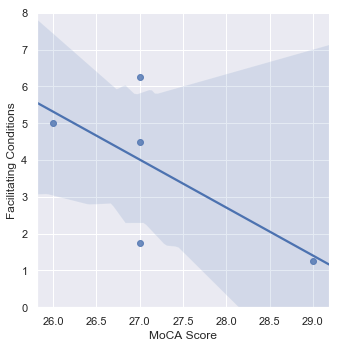

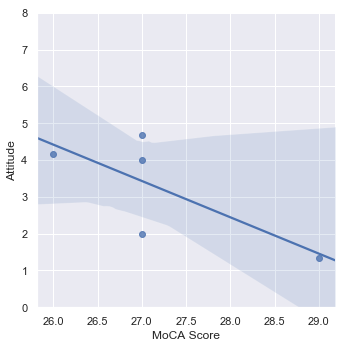

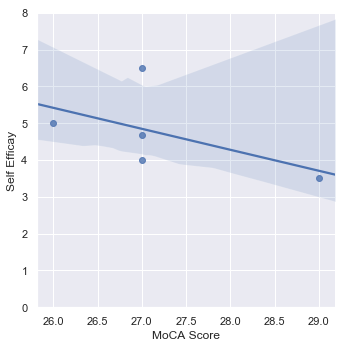

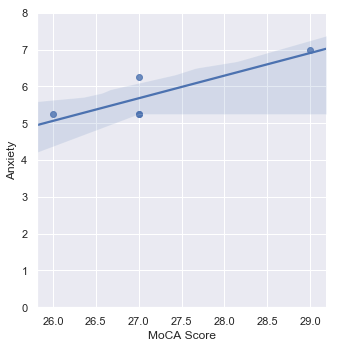

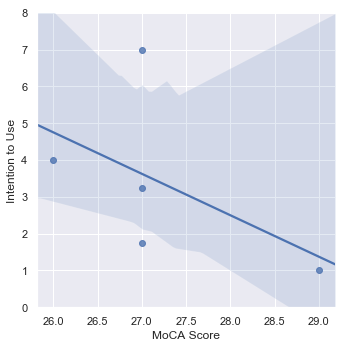

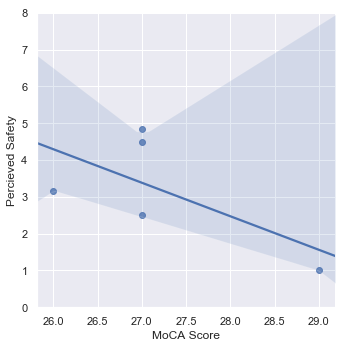

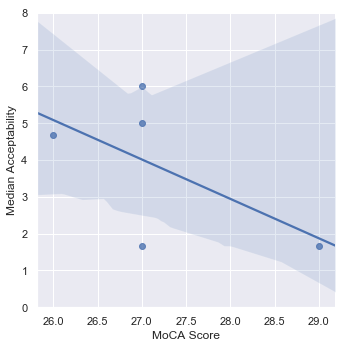

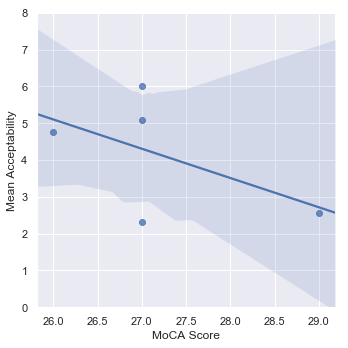

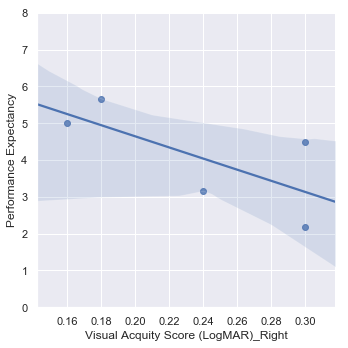

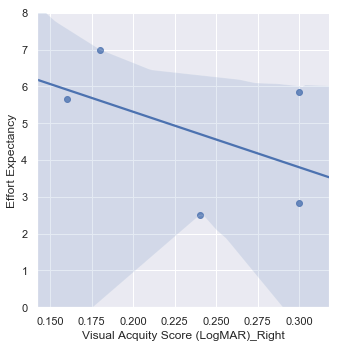

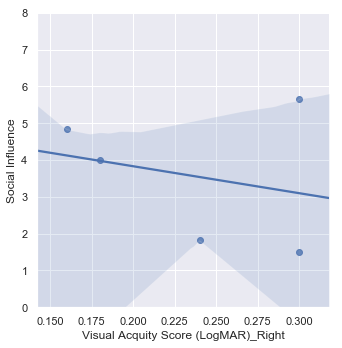

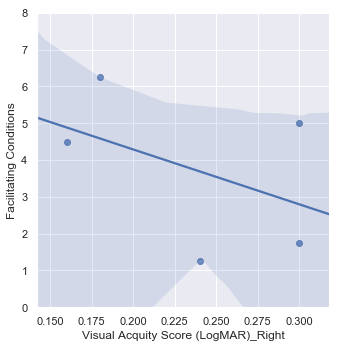

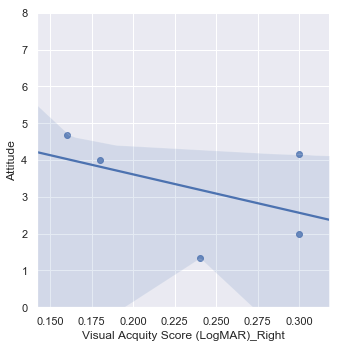

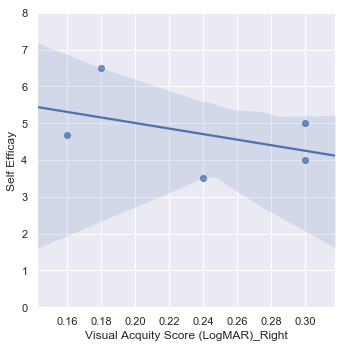

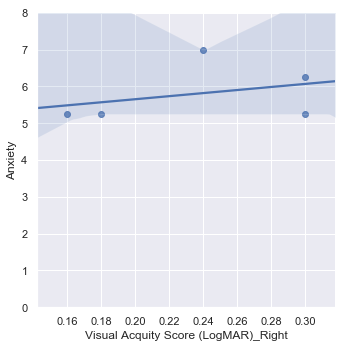

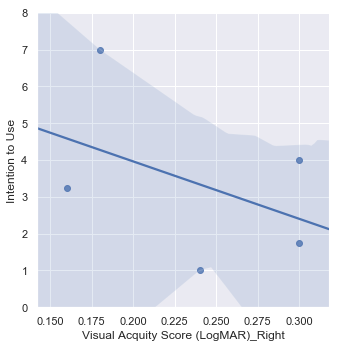

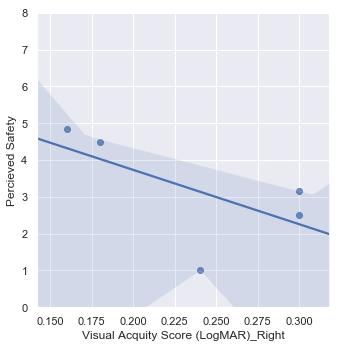

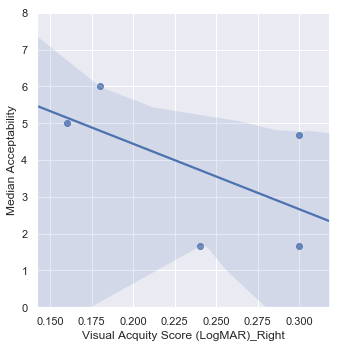

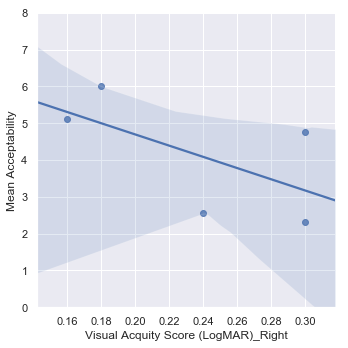

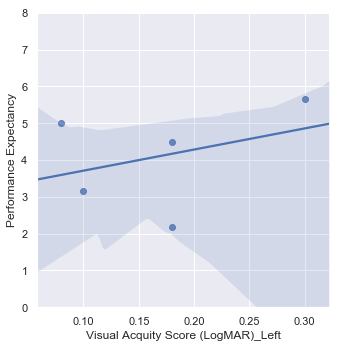

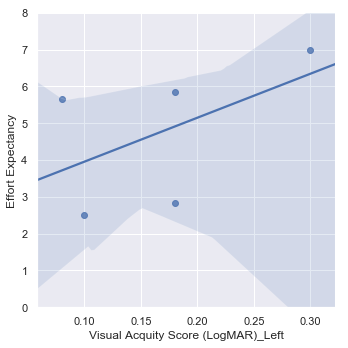

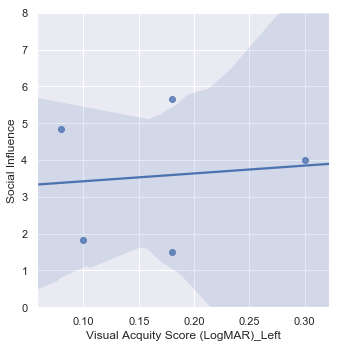

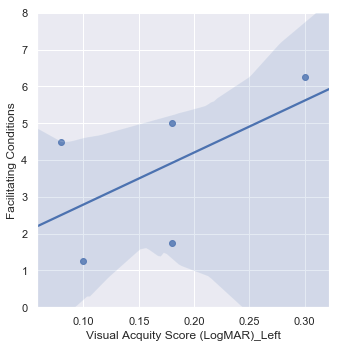

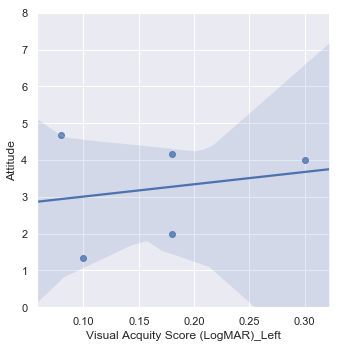

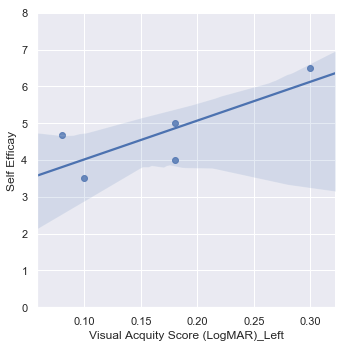

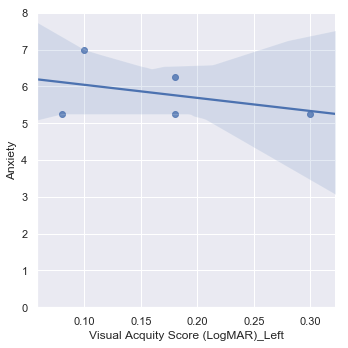

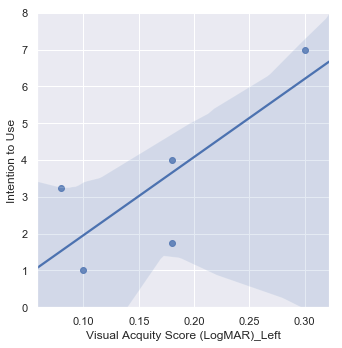

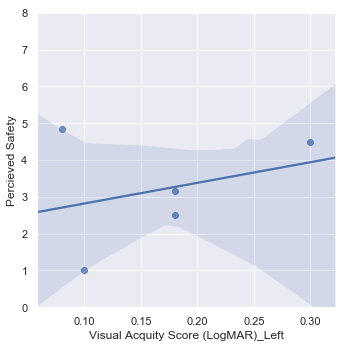

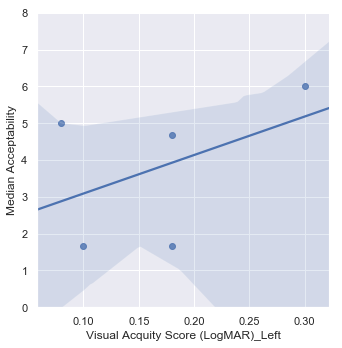

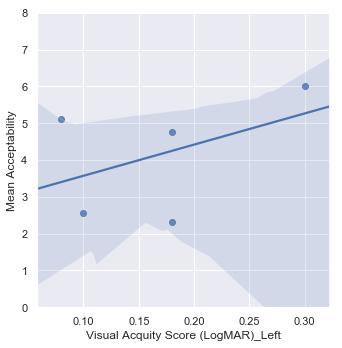

In [356]:
# Now we will concat the *acc_total_complete* with * countable demographics
data = pd.concat([acc_total_per_per_participant, countable_demographics],1)

# Let's draw the regression lines:
sns.set(style="darkgrid")

for x in countable_demographics_measures:
    for y in acc_total_per_per_participant.keys():
        g = (sns.lmplot(x=x, y=y, data = data)).set(ylim = (0,8))

#### 3.4.3 We will be looking at the TOTAL ACC and subscale across driving conditions

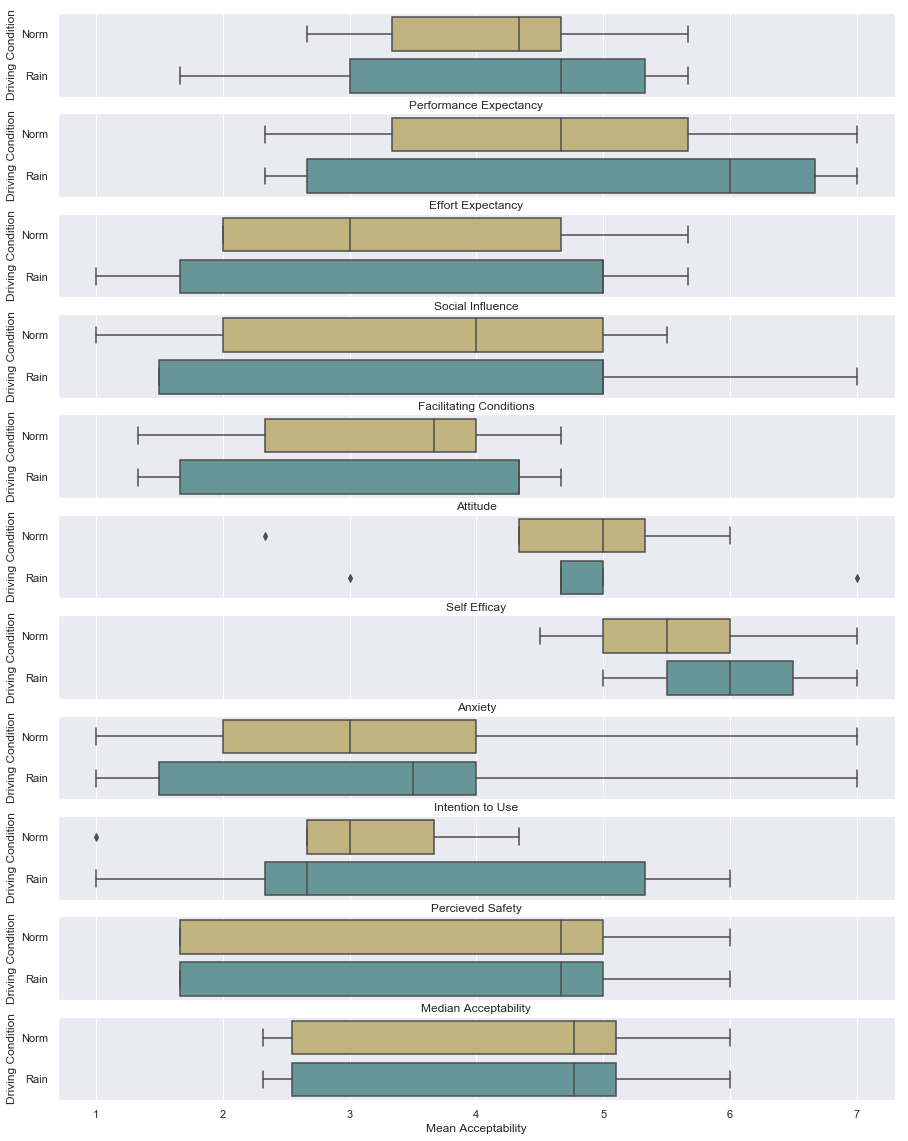

In [360]:
# specifying color for each group
my_pal = {'Norm':'y', 'Rain':'cadetblue'}
# for traffic added: my_pal = {'norm':'y', 'rain':'cadetblue', 'Traffic': 'darksalmon'}

figure, axes = plt.subplots(len(acc_total_per_per_participant.keys()),1, figsize = (15,20), sharex= True)
i = 0
for x in acc_total_per_per_participant.keys():
    sns.boxplot(x=x,y='Driving Condition', data=acc_total_per_scenario, orient= "h",ax = axes[i], palette = my_pal);
    i = i+1 

#### 3.4.4 We will be looking at each scenario's ACC and subscale as a function of demographics

Which of the ACC scales or total mean or median as a function of countable demographics?Anxiety


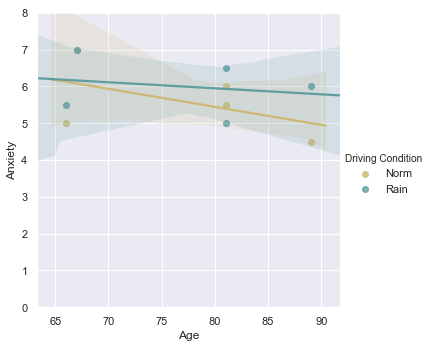

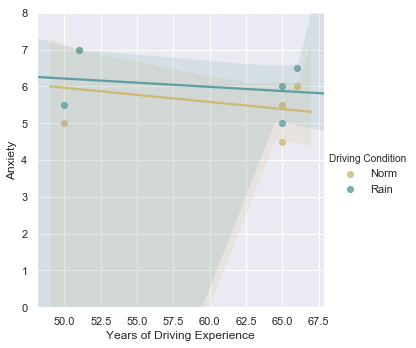

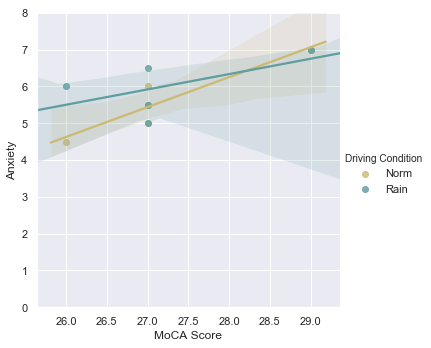

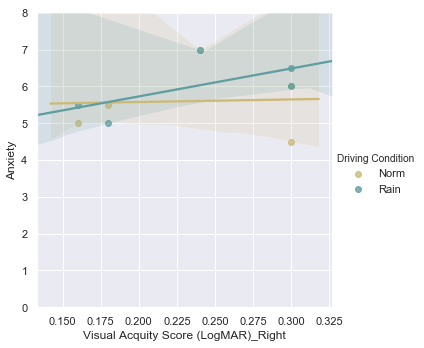

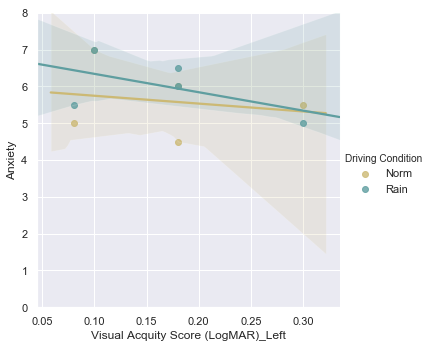

In [362]:
# now we are going to plot 
acc_scale = input("Which of the ACC scales or total mean or median as a function of countable demographics?")
for x in countable_demographics_measures:
    g = (sns.lmplot(x=x, y=acc_scale, hue="Driving Condition", data=demo_acc, palette = my_pal)).set(ylim = (0,8))

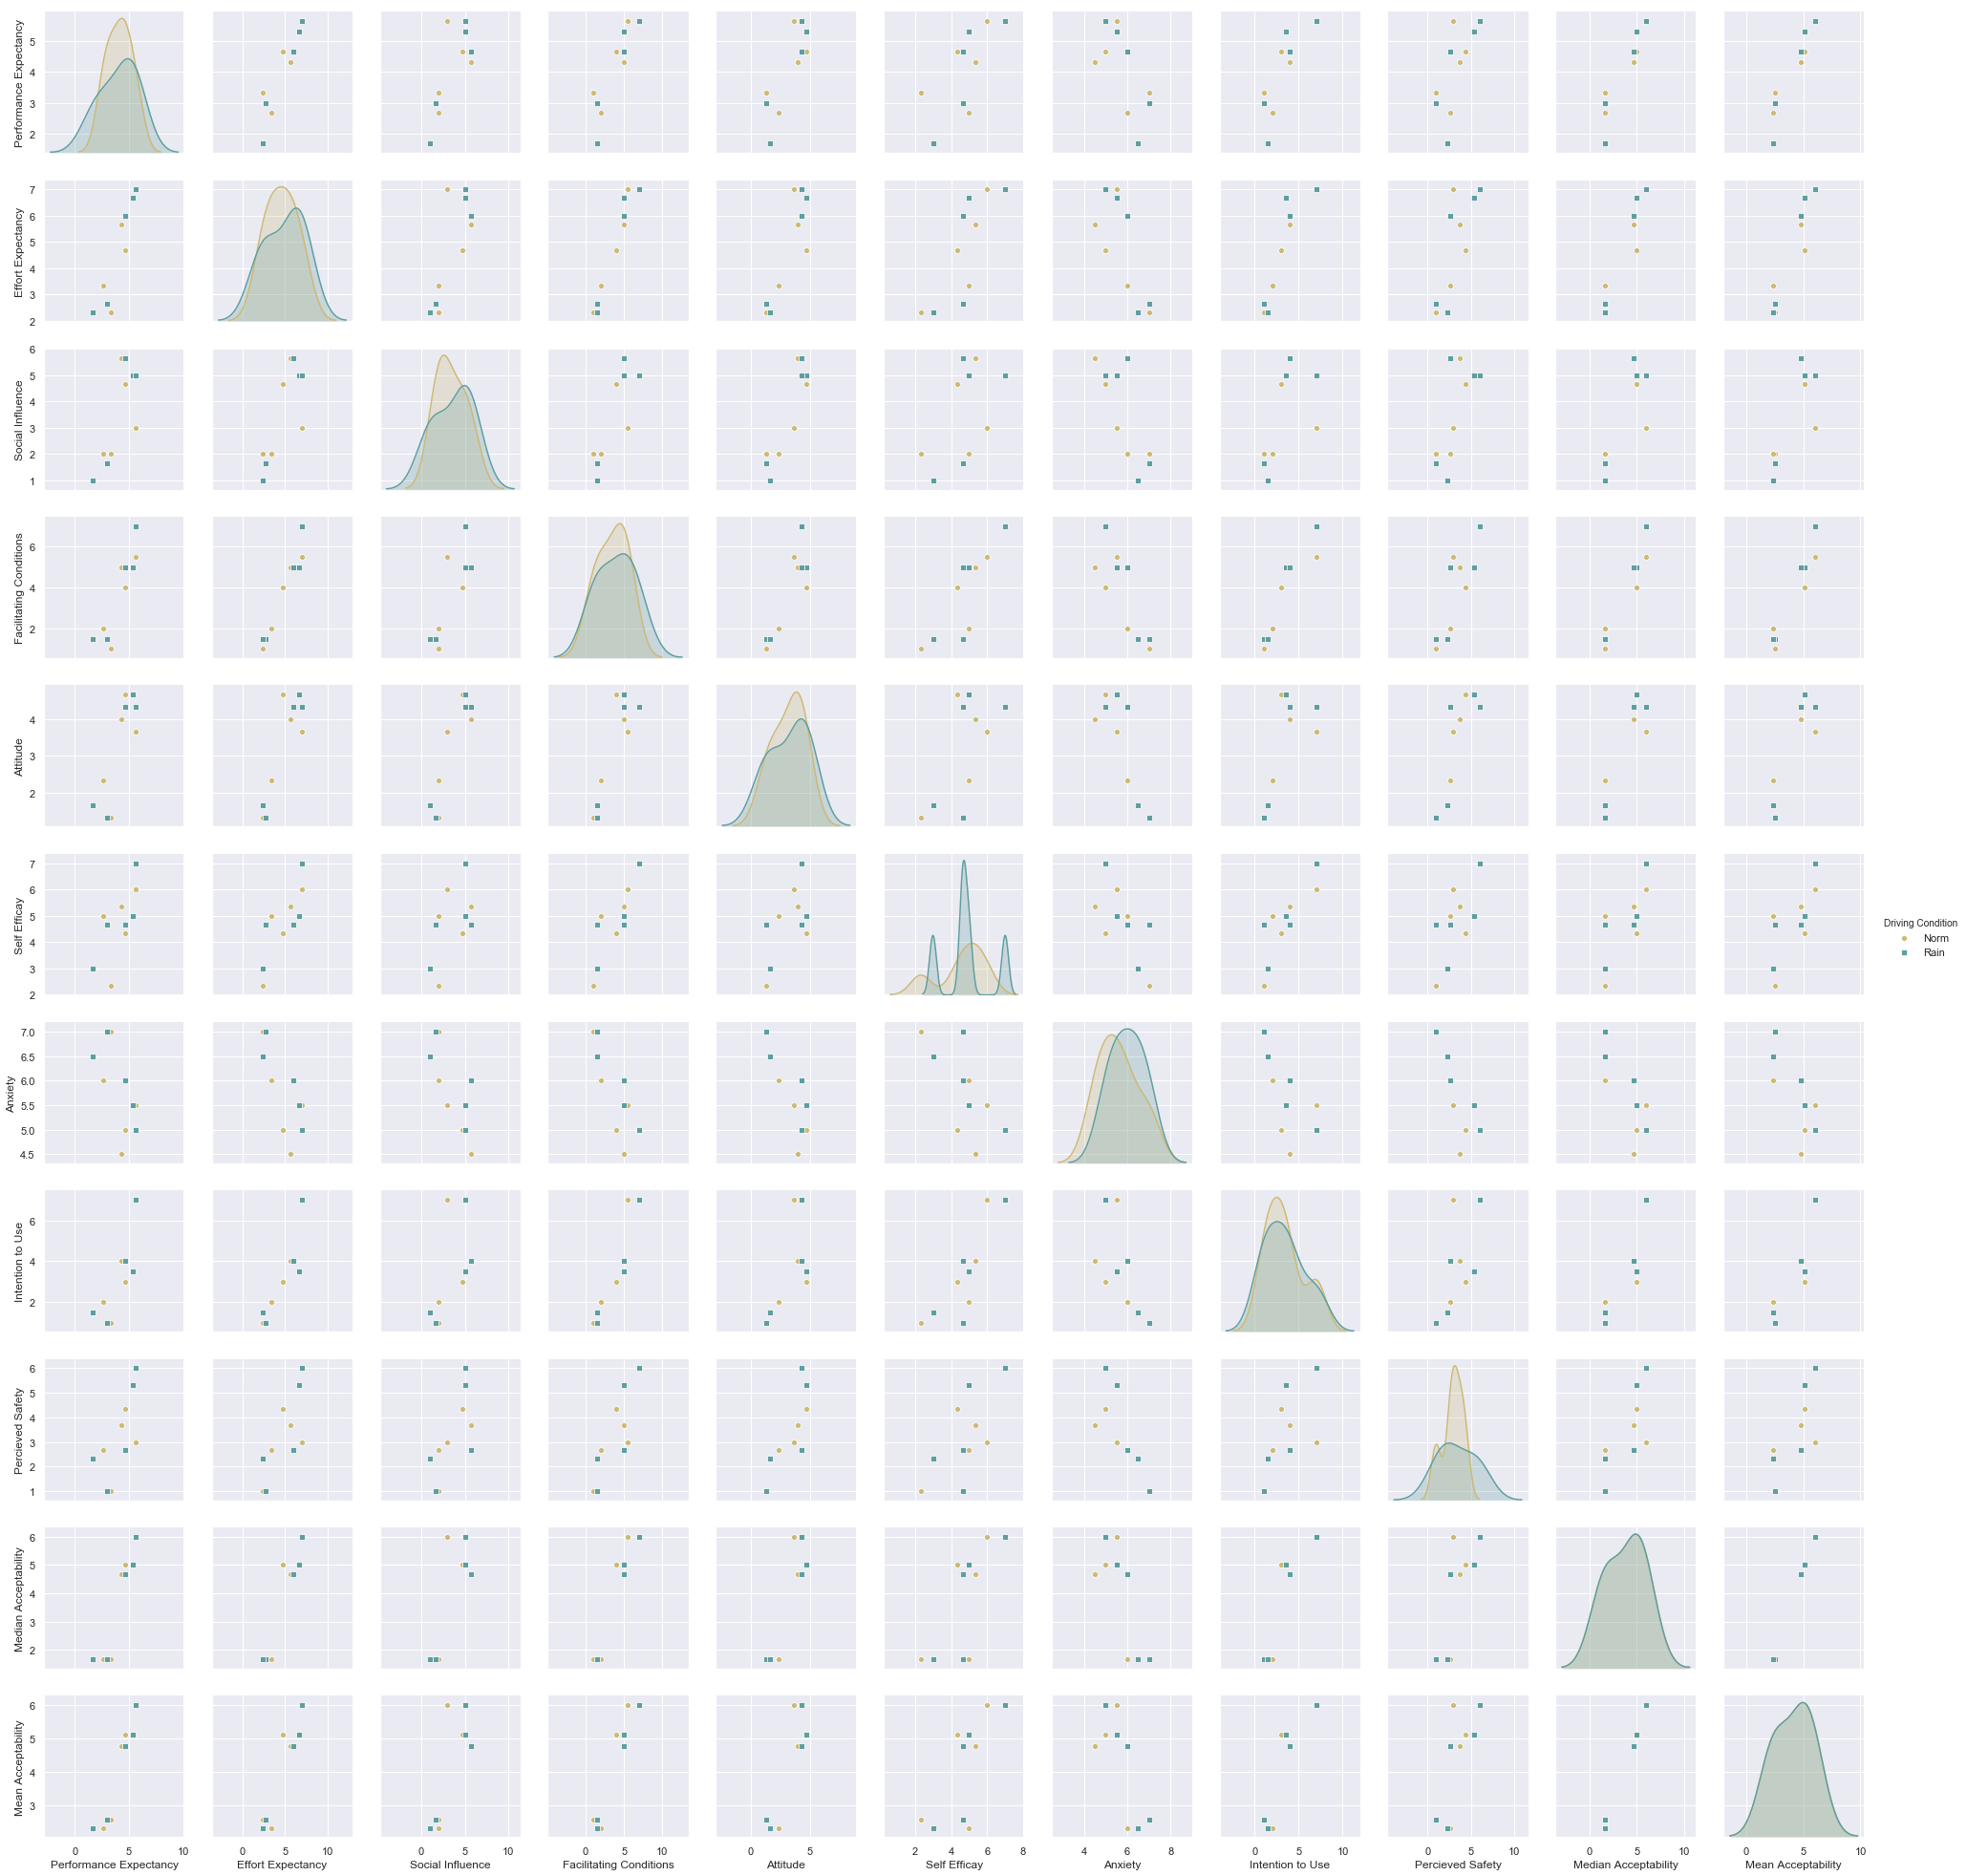

In [363]:
sns.pairplot(acc_total_per_scenario, kind="scatter", hue="Driving Condition", markers=["o", "s"], palette= my_pal)
plt.show()


## 3.5 ACC scores and POMS Scores

In [364]:
acc_POMS = pd.concat([acc_total_per_per_participant, POMS_tscores],1)

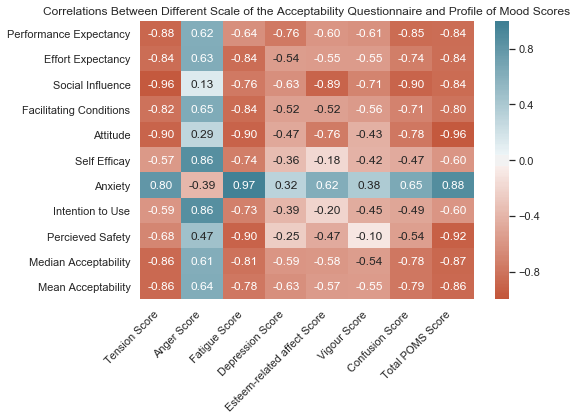

In [365]:
acc_POMS_corr = acc_POMS.corr().loc[acc_total_per_per_participant.keys(), POMS_tscores.keys()]


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(acc_POMS_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability Questionnaire and Profile of Mood Scores")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

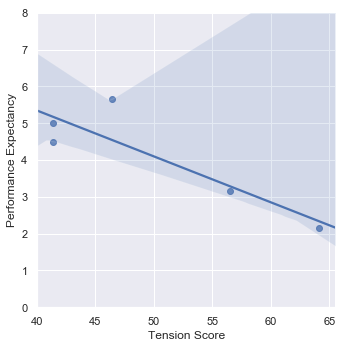

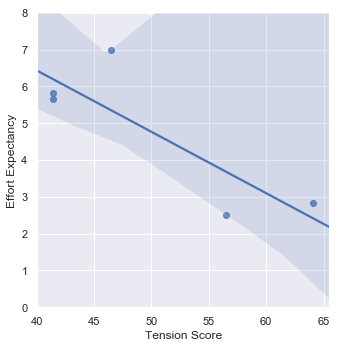

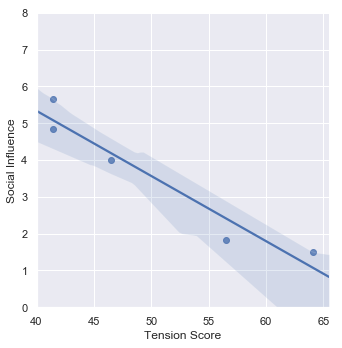

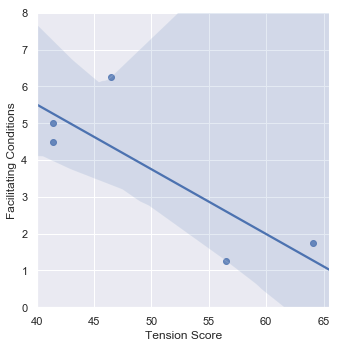

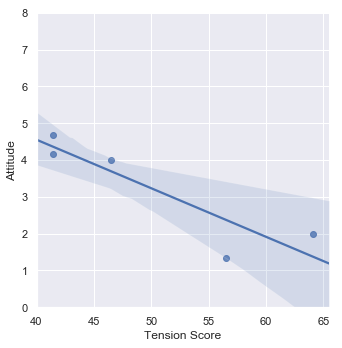

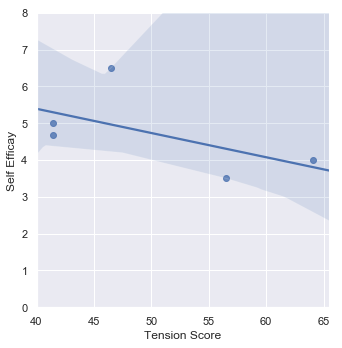

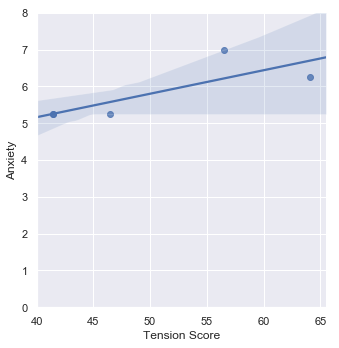

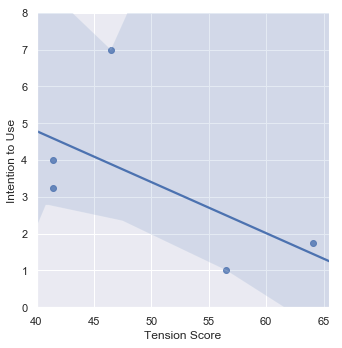

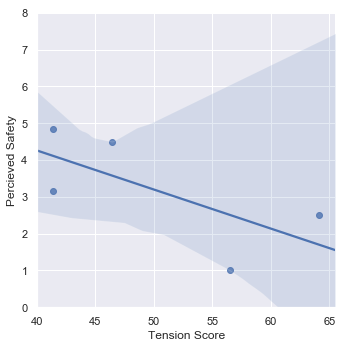

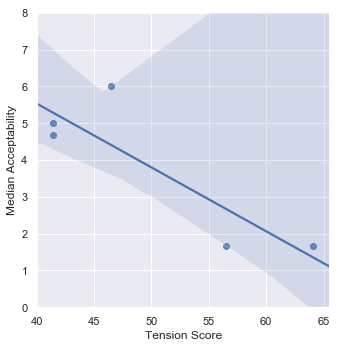

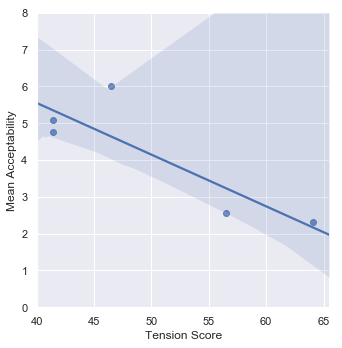

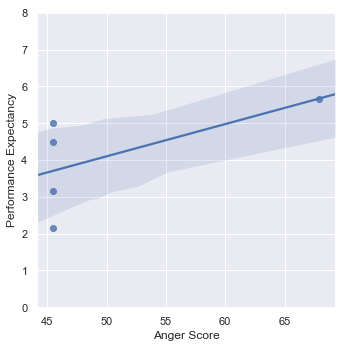

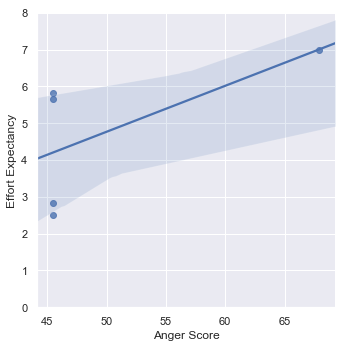

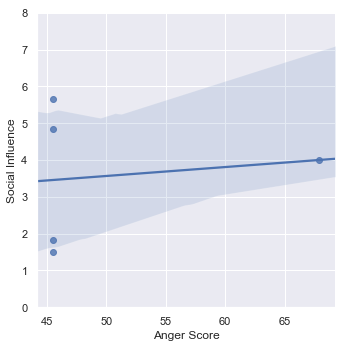

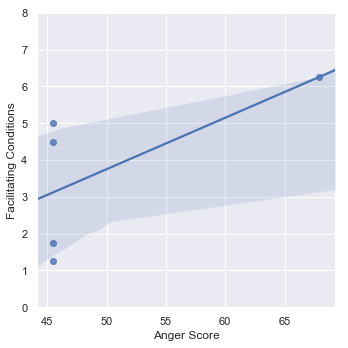

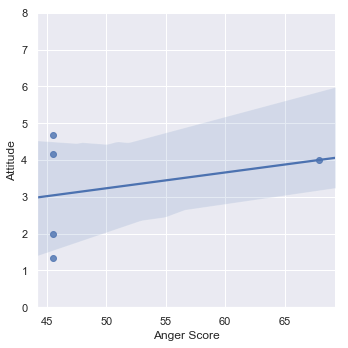

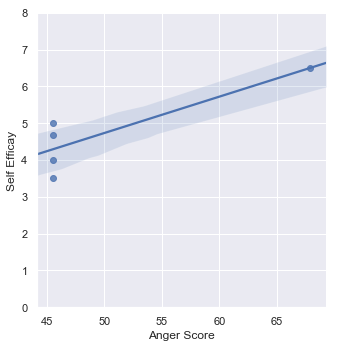

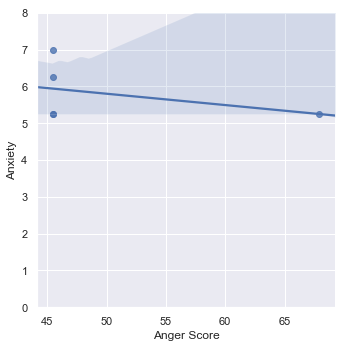

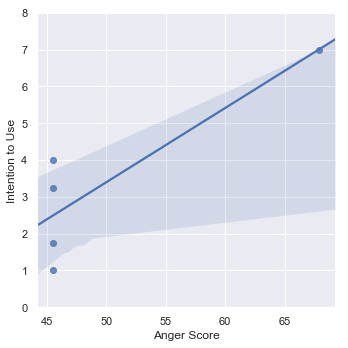

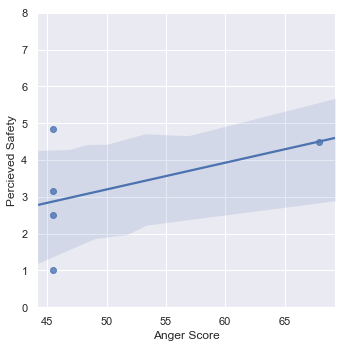

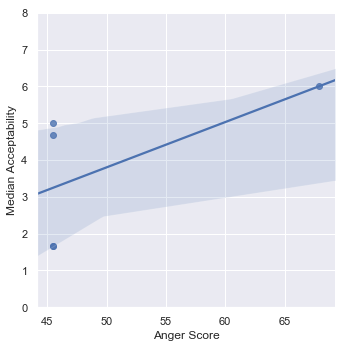

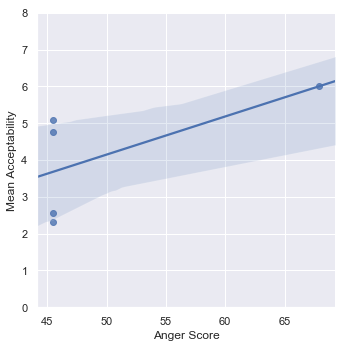

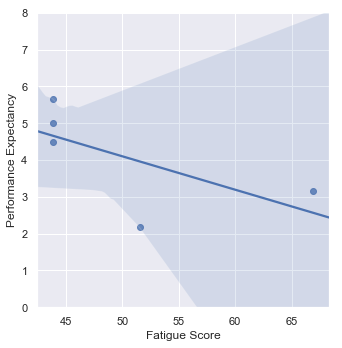

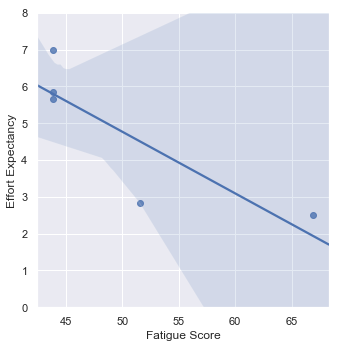

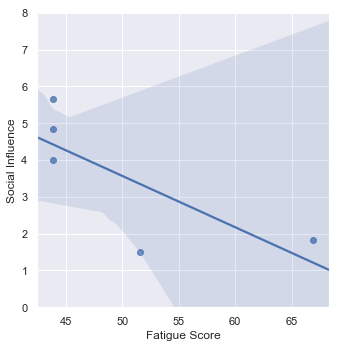

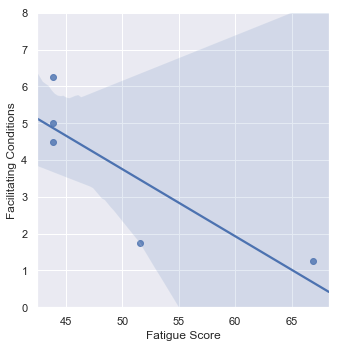

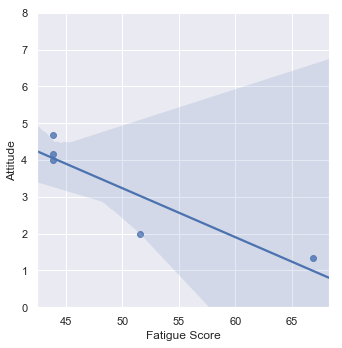

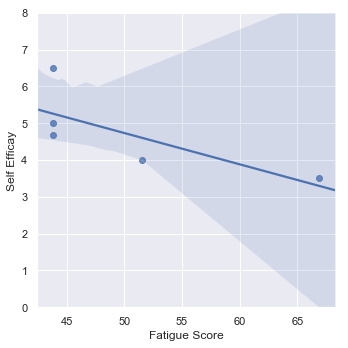

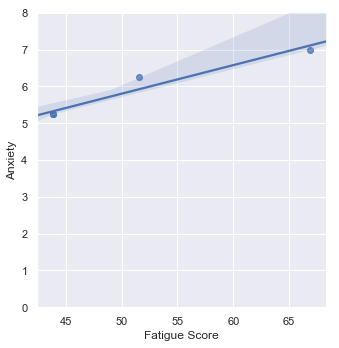

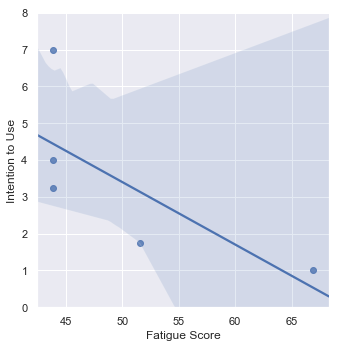

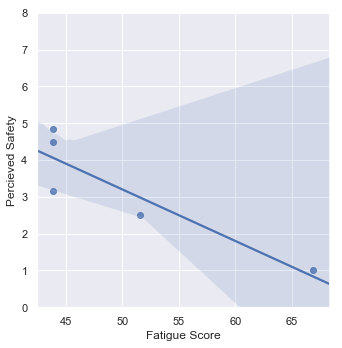

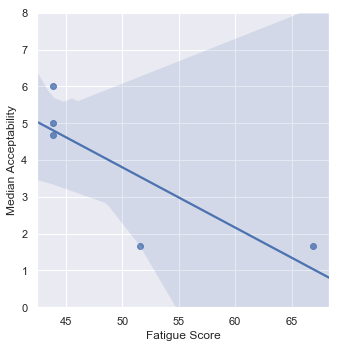

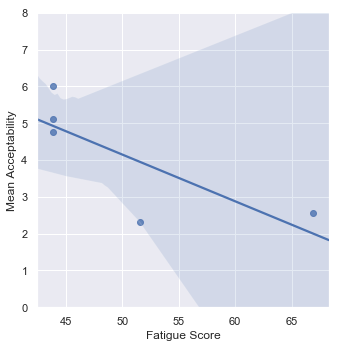

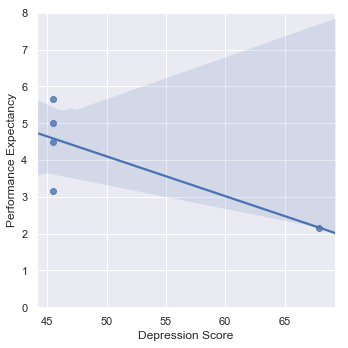

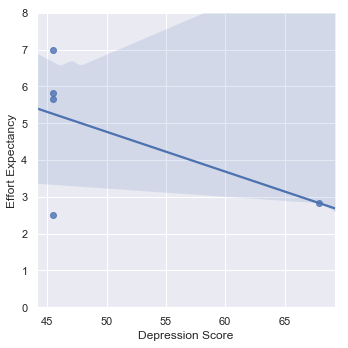

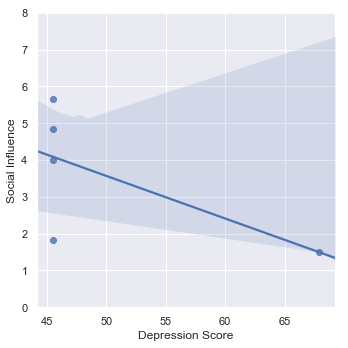

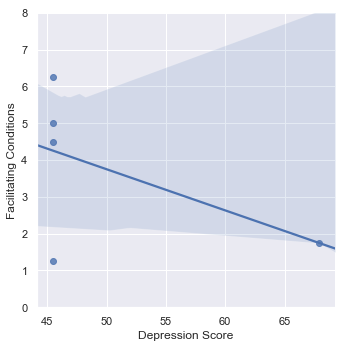

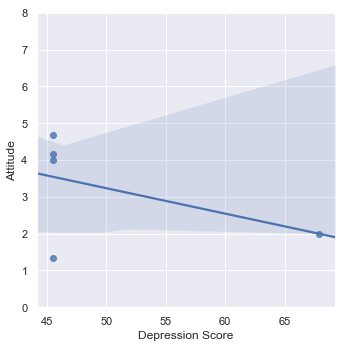

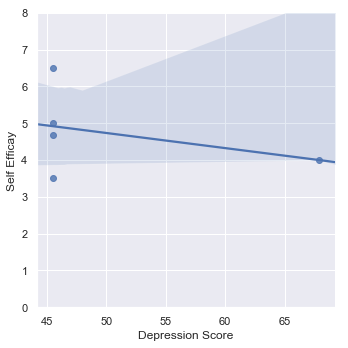

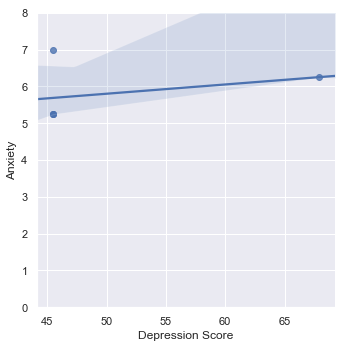

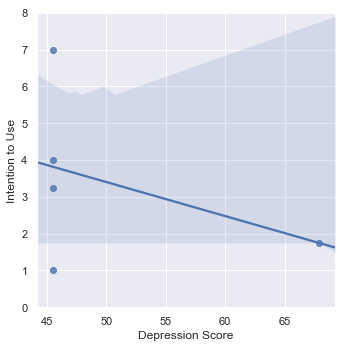

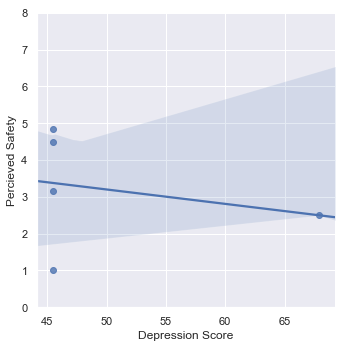

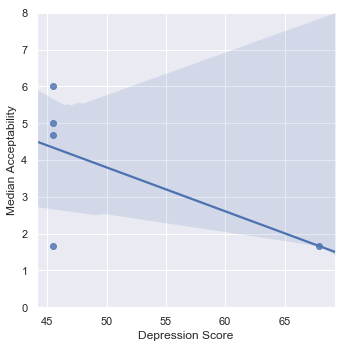

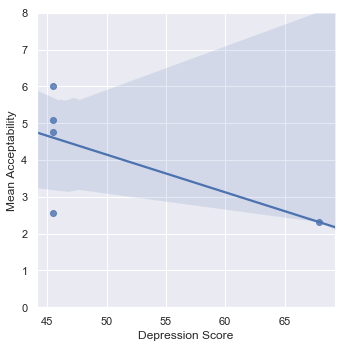

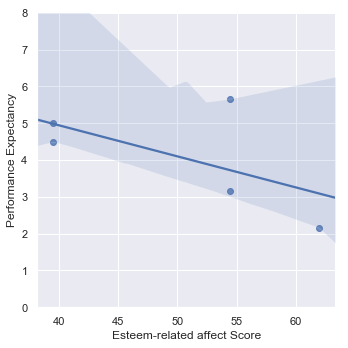

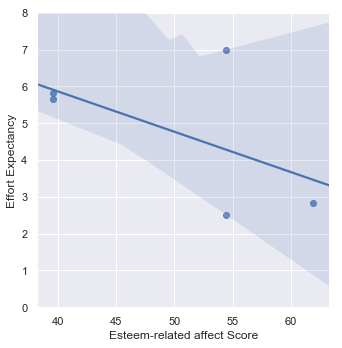

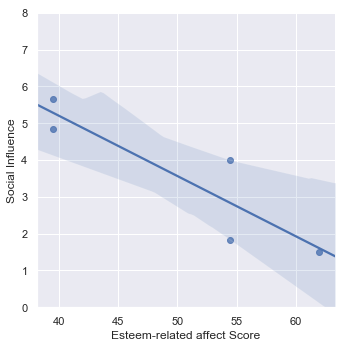

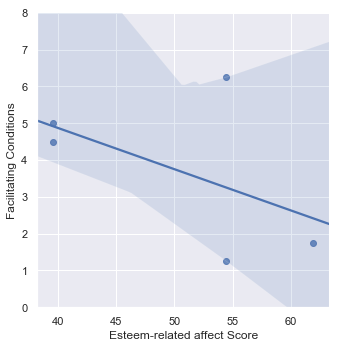

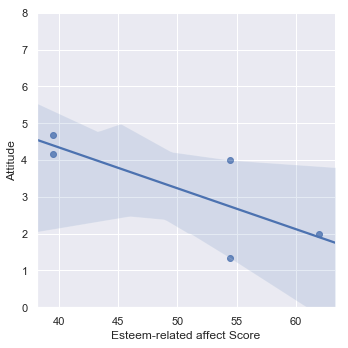

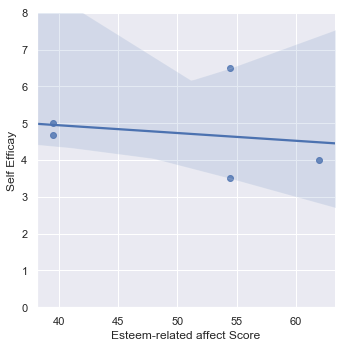

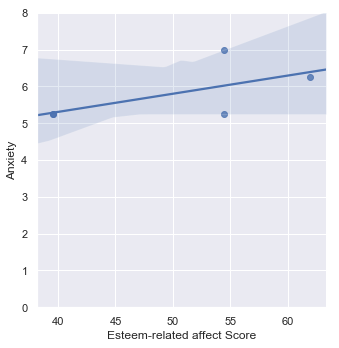

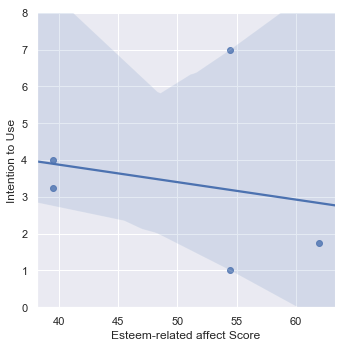

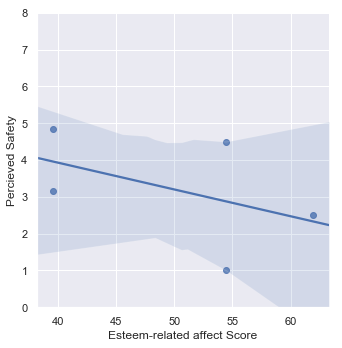

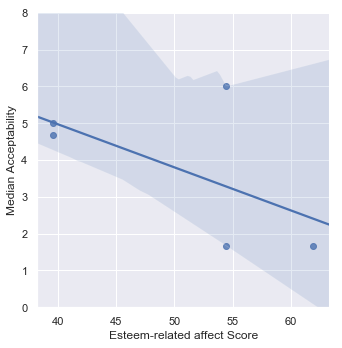

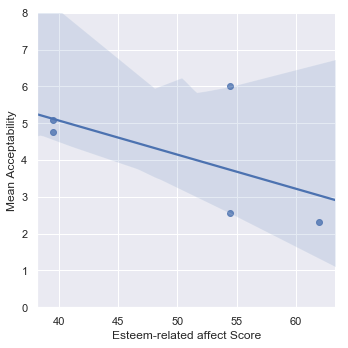

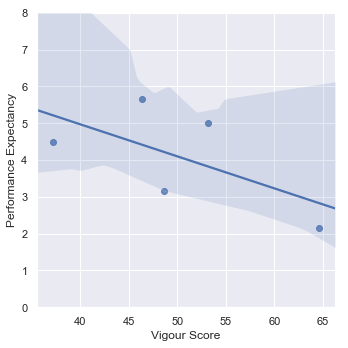

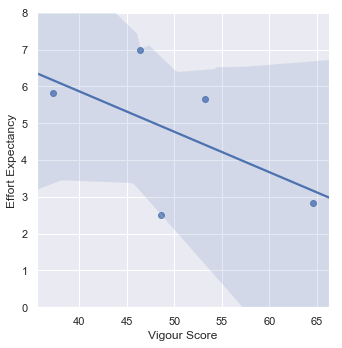

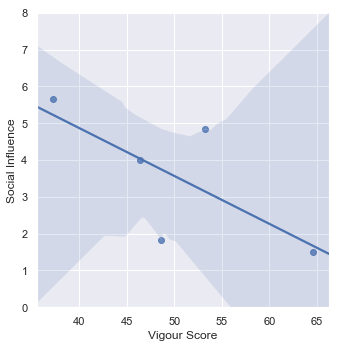

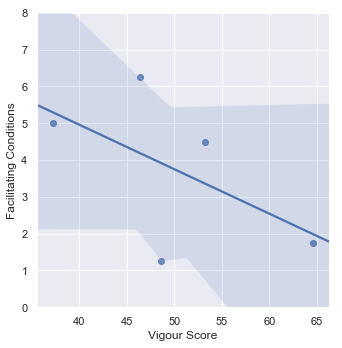

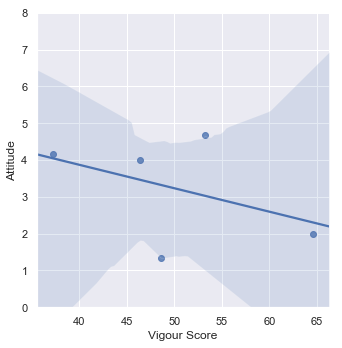

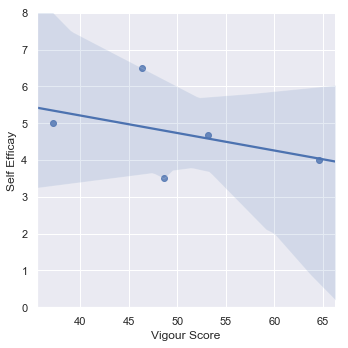

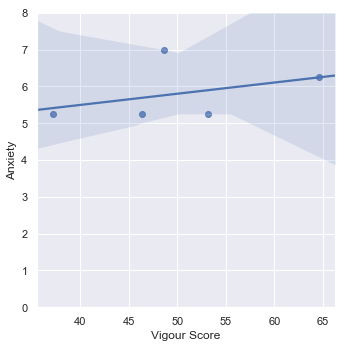

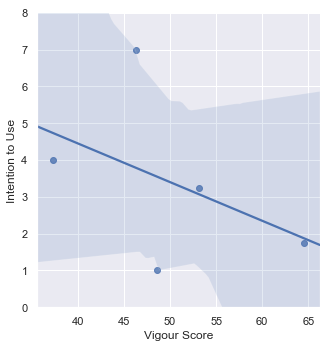

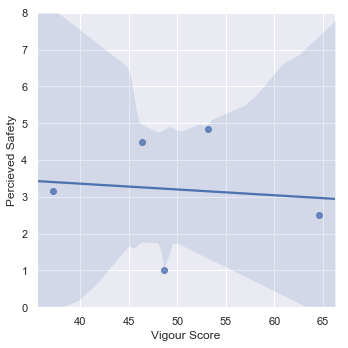

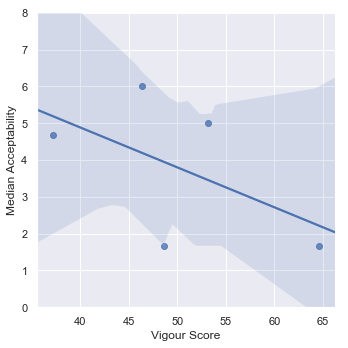

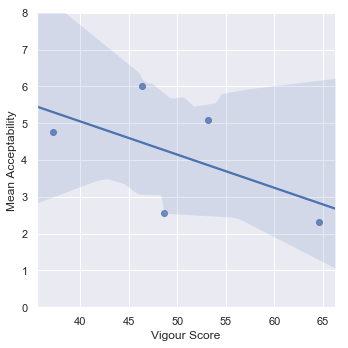

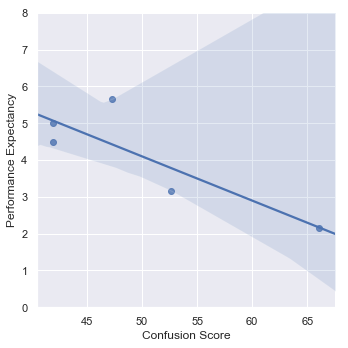

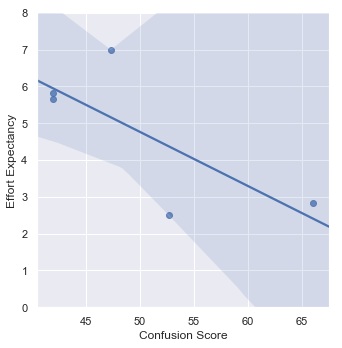

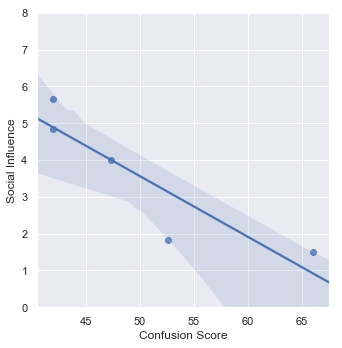

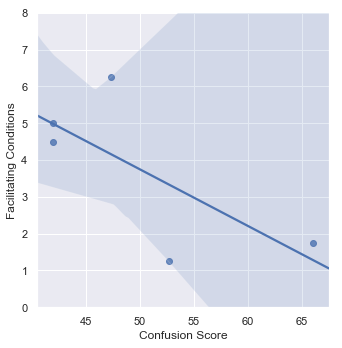

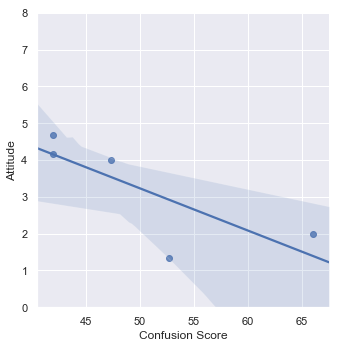

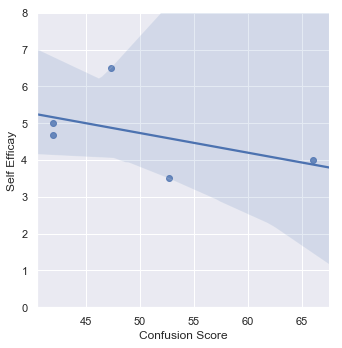

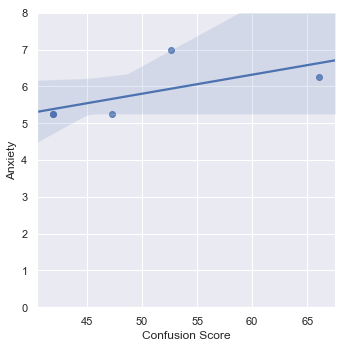

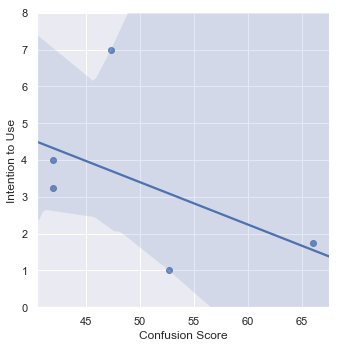

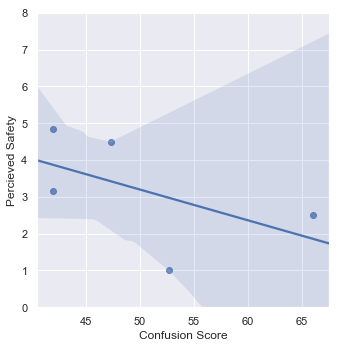

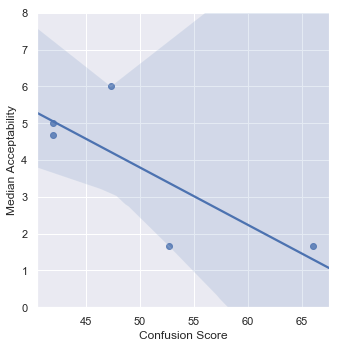

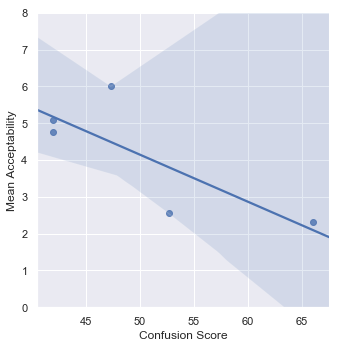

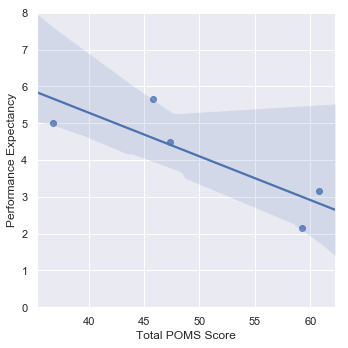

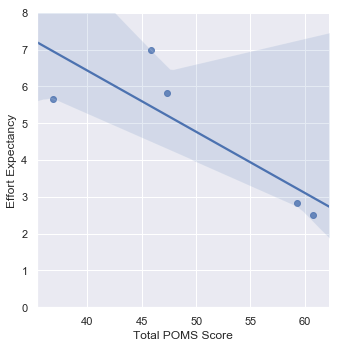

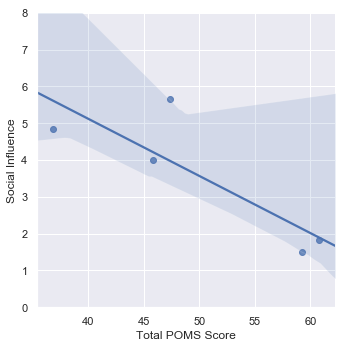

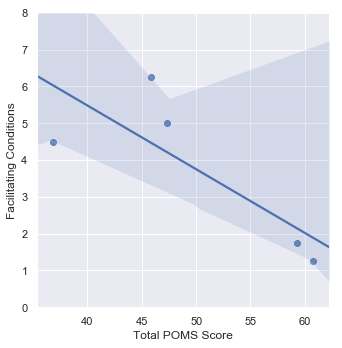

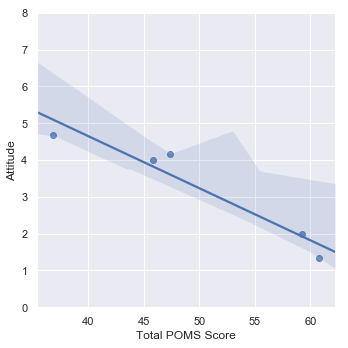

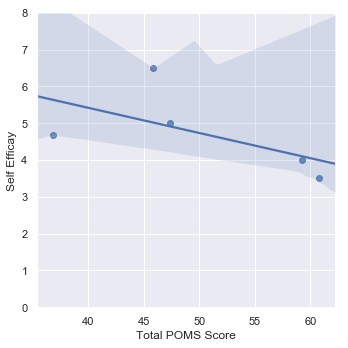

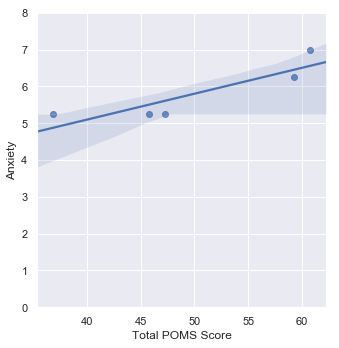

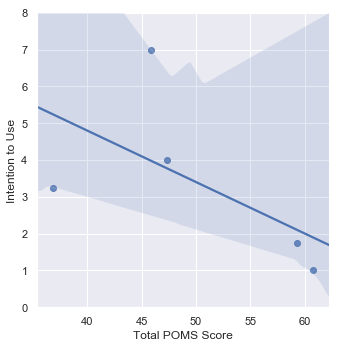

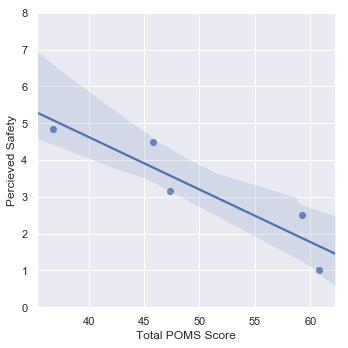

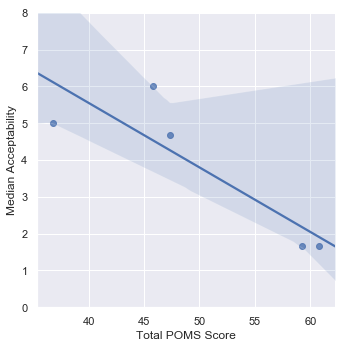

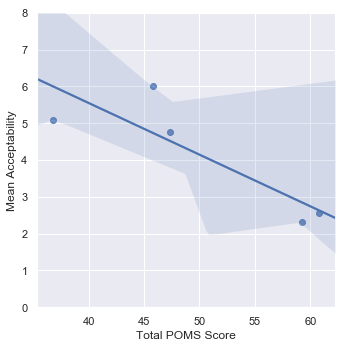

In [366]:
for x in POMS_tscores:
    for y in acc_total_per_per_participant.keys():
        g = (sns.lmplot(x=x, y=y, data = acc_POMS )).set(ylim = (0,8))

## 3.6 Correlation of ACC Scores with Participant groups

- If they have done Manual or Auto first
- If they have done rain or traffic first
- combined across 4 groups

## 3.6 AONOVA - Significance of Variability of ACC between conditions

In [ ]:
X = demo_acc.loc[:, 'Age']
y = demo_acc.loc[:,acc_scale]
model_fit = sm.OLS(y, sm.add_constant(X)).fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X, y], axis=1)

# model values
model_fitted_y = model_fit.fittedvalues
        # model residuals
        model_residuals = model_fit.resid
        # normalized residuals
        model_norm_residuals = model_fit.get_influence().resid_studentized_internal
        # absolute squared normalized residuals
        model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
        # absolute residuals
        model_abs_resid = np.abs(model_residuals)
        # leverage, from statsmodels internals
        model_leverage = model_fit.get_influence().hat_matrix_diag
        # cook's distance, from statsmodels internals
        model_cooks = model_fit.get_influence().cooks_distance[0]

        plot_lm_1 = plt.figure()
        plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                                lowess=True,
                                scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

        plot_lm_1.axes[0].set_title('Residuals vs Fitted')
        plot_lm_1.axes[0].set_xlabel('Fitted values')
        plot_lm_1.axes[0].set_ylabel('Residuals');

        # annotations
        abs_resid = model_abs_resid.sort_values(ascending=False)
        abs_resid_top_3 = abs_resid[:3]

In [183]:
diagnostic_plots(demo_acc.loc[:,'Age'], demo_acc.loc[:,acc_scale], model_fit=None)
def diagnostic_plots(X, y, model_fit=None):
    """
    Function to reproduce the 4 base plots of an OLS model in R.

    ---
      Inputs:

      X: A numpy array or pandas dataframe of the features to use in building the linear regression model

      y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

      model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
    """

    if not model_fit:
        model_fit = sm.OLS(y, sm.add_constant(X)).fit()

    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X, y], axis=1)

    # model values
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]
    
    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');

    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]));

    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

  # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));


    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
        np.linspace(0.001, max(model_leverage), 50)) # 1 line
    plot_lm_4.legend(loc='upper right');

           df    sum_sq   mean_sq         F    PR(>F)
Age       1.0  0.845275  0.845275  1.175069  0.309947
Residual  8.0  5.754725  0.719341       NaN       NaN


# 4. Simulation Sickness Questionnaire

It is calculated by adding scores on the 16 items and multiplying the achieved sum by 3.74, therefore the total score can range from 0 to 179.52.

According to the results of a factor analysis, the items of the SSQ can be grouped into three factors: nausea (e.g., sweating, difficulty concentrating, stomach awareness), oculomotor disturbance (e.g., headache, eyestrain, blurred vision) and disorientation (e.g., fullness head, dizziness with open and closed eyes, vertigo). The factors are not entirely independent – some of the items were included in more than one factor, e.g., the score on difficulty focusing is used to assess the severity of oculomotor disturbance and disorientation. In total, there are five such items. To calculate scores on each factor, all relevant items’ scores should be added (each factor consists of 7 items) and multiplying the obtained sum by a specific weight: for nausea by 9.54 (therefore the scores on this scale range from 0 to 200.34), for disorientation by 13.92 (scores ranging from 0 to 292.32) and for oculomotor disturbance by 7.58 (with scores ranging from 0 to 159.18).

In [368]:
# reading the SSQ data into a dataframe--- index = participant ID, colums = feature label
SSQ = pd.read_excel(Qualitative_Path + "SSQ.xlsx", sheet_name = "Master_SSQ")
SSQ = SSQ.set_index('Participant ID')
SSQ_Analyzed = SSQ.loc[Analyzed_IDs]
SSQ_Analyzed = SSQ_Analyzed.drop(columns = ["Status"])
SSQ_Analyzed = SSQ_Analyzed.loc[:,['SSQ_NA','SSQ_NM','SSQ_RM','SSQ_RA']]

In [369]:
SSQ_Analyzed

SSQ_NA  SSQ_NM  SSQ_RM  SSQ_RA
Participant ID                                
4.0                4.0     4.0     4.0     6.0
7.0                0.0     0.0     0.0     1.0
9.0                4.0     7.0     6.0     2.0
16.0               4.0     0.0     3.0     8.0
18.0               8.0     8.0     5.0     9.0

## 4.1 The correlation of SSQ scores and Total ACC

In [370]:
data = pd.concat([avg_acc_all_conditions, SSQ_Analyzed], 1)
data
data.corr().drop(index = ['SSQ_PM', 'SSQ_PA','SSQ_NA','SSQ_NM','SSQ_RA','SSQ_RM','SSQ_TM', 'SSQ_TA',
                          'mean of SSQ scores', 'mean manual', 'mean auto', 'median total'
                         , 'median manual' , 'median auto'], columns = 'Total Acceptability Score')

NameError: name 'avg_acc_all_conditions' is not defined

## 4.2 The correlation of SSQ scores and ACC scores of each session

In [374]:
SSQ_Total = pd.concat([SSQ_Analyzed.loc[:,'SSQ_NA'], SSQ_Analyzed.loc[:,'SSQ_NM'],SSQ_Analyzed.loc[:,'SSQ_RM'],
                       SSQ_Analyzed.loc[:,'SSQ_RA']],0)

SSQ_Total = pd.DataFrame(SSQ_Total, columns = ['Score'])
SSQ_Total.loc[:, 'Driving Condition']= [str('Norm')]*len(SSQ_Analyzed)*2  + [str('Rain')]*len(SSQ_Analyzed)*2
SSQ_Total.loc[:, 'LoA'] = 2* (['Auto']*len(SSQ_Analyzed) + ['Manual']*len(SSQ_Analyzed))

In [375]:
SSQ_Total

Score Driving Condition     LoA
Participant ID                                 
4.0               4.0              Norm    Auto
7.0               0.0              Norm    Auto
9.0               4.0              Norm    Auto
16.0              4.0              Norm    Auto
18.0              8.0              Norm    Auto
4.0               4.0              Norm  Manual
7.0               0.0              Norm  Manual
9.0               7.0              Norm  Manual
16.0              0.0              Norm  Manual
18.0              8.0              Norm  Manual
4.0               4.0              Rain    Auto
7.0               0.0              Rain    Auto
9.0               6.0              Rain    Auto
16.0              3.0              Rain    Auto
18.0              5.0              Rain    Auto
4.0               6.0              Rain  Manual
7.0               1.0              Rain  Manual
9.0               2.0              Rain  Manual
16.0              8.0              Rain  Manual
18.0              9.0              Rain  Manual

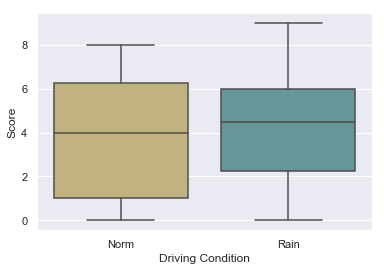

In [376]:
sns.boxplot(y = 'Score', x = 'Driving Condition', data = SSQ_Total, palette=my_pal)

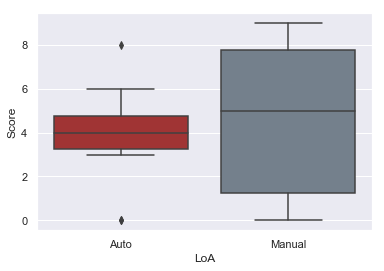

In [308]:
sns.boxplot(y = 'Score', x = 'LoA', data = SSQ_Total, palette=dict(Manual= 'slategrey', Auto= 'firebrick'))

In [377]:
SSQ = SSQ_Total.groupby(['Participant ID', 'Driving Condition']).mean()
SSQ

Score
Participant ID Driving Condition       
4.0            Norm                 4.0
               Rain                 5.0
7.0            Norm                 0.0
               Rain                 0.5
9.0            Norm                 5.5
               Rain                 4.0
16.0           Norm                 2.0
               Rain                 5.5
18.0           Norm                 8.0
               Rain                 7.0

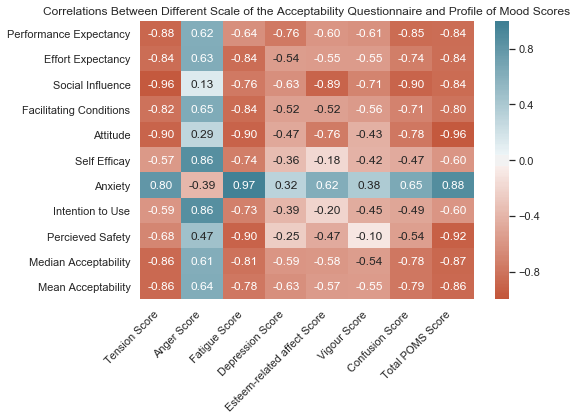

In [378]:
acc_POMS_corr = acc_POMS.corr().loc[acc_total_per_per_participant.keys(), POMS_tscores.keys()]


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(acc_POMS_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Different Scale of the Acceptability Questionnaire and Profile of Mood Scores")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

## 4. Significance

### 4.1 ACC Scores between driving condition
- Dependent Variable: Acceptability Scores and sub-sclae scores

- Independent Variable: Driving Condition (Levels: Normal, Rain) --> One-way ANOVA: Two means are equal

null hypothesis: The means are equal

In [392]:
data = acc_total_per_scenario.copy()
for x in acc_total_per_per_participant.keys():
    print("Effects of Driving Condition on " + x)
    print(stats.f_oneway(data[x][data["Driving Condition"]=="Norm"],data[x][data["Driving Condition"]=="Rain"]))

Effects of Driving Condition on Performance Expectancy
F_onewayResult(statistic=0.005263157894736834, pvalue=0.9439471187514308)
Effects of Driving Condition on Effort Expectancy
F_onewayResult(statistic=0.06544502617801042, pvalue=0.8045430436399981)
Effects of Driving Condition on Social Influence
F_onewayResult(statistic=0.027149321266968326, pvalue=0.8732118944267286)
Effects of Driving Condition on Facilitating Conditions
F_onewayResult(statistic=0.12987012987012986, pvalue=0.7278962130986486)
Effects of Driving Condition on Attitude
F_onewayResult(statistic=0.004999999999999986, pvalue=0.945363716710635)
Effects of Driving Condition on Self Efficay
F_onewayResult(statistic=0.08888888888888904, pvalue=0.7731910360842285)
Effects of Driving Condition on Anxiety
F_onewayResult(statistic=0.5161290322580646, pvalue=0.4929429157541294)
Effects of Driving Condition on Intention to Use
F_onewayResult(statistic=2.1563396042487795e-32, pvalue=1.0)
Effects of Driving Condition on Percieved 

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

In [417]:
demo_acc.rename(columns= {'Performance Expectancy':'PE','Effort Expectancy':'EF',
                          'Social Influence': 'SI', 'Facilitating Condition': 'FC',
                          'Driving Condition': 'Scenario','MoCA Score': 'MoCA', 
                         'Mean Acceptability': 'meanACC', 'Median Acceptability': 'medACC'}, inplace=True)

mod = ols('Anxiety ~ Scenario', data = demo_acc).fit()
mod.summary()
aov_table = sm.stats.anova_lm(mod, type = 1)
print(anova_table(aov_table))

          sum_sq   df  mean_sq         F    PR(>F)    eta_sq  omega_sq
Scenario     0.4  1.0    0.400  0.516129  0.492943  0.060606 -0.050847
Residual     6.2  8.0    0.775       NaN       NaN       NaN       NaN


C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [418]:
mod = ols('Anxiety ~ MoCA*Scenario', data = demo_acc).fit()
mod.summary()
aov_table = sm.stats.anova_lm(mod, type = 1)
print(anova_table(aov_table))

                 sum_sq   df   mean_sq         F    PR(>F)    eta_sq  omega_sq
Scenario       0.400000  1.0  0.400000  1.091943  0.336301  0.060606  0.004835
MoCA           3.626042  1.0  3.626042  9.898578  0.019911  0.549400  0.467926
MoCA:Scenario  0.376042  1.0  0.376042  1.026540  0.350073  0.056976  0.001396
Residual       2.197917  6.0  0.366319       NaN       NaN       NaN       NaN


C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


- sum_sq: The sum of squares for the model is how much variance is explained by our proposed Invariable and how much of it remains unexplained. 
- 

### 4) Factor Analysis

In [168]:
AN_scale_items

['Concerns', 'Frightening']